# Aplicación de algoritmos de clasificación para predecir los sobrevivientes del titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

# Analisis de set de datos test

In [2]:
path="test.csv"

In [3]:
test = pd.read_csv(path) 

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
test.shape

(418, 11)

In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

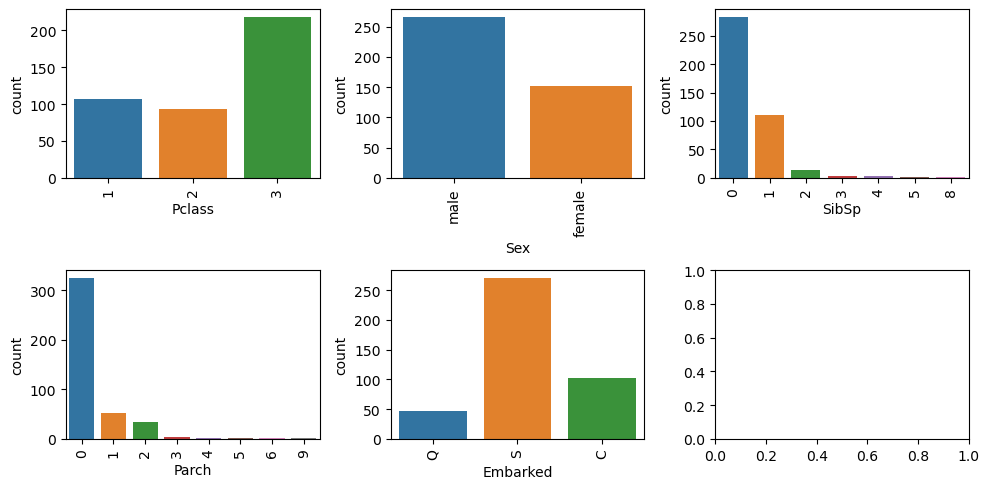

In [9]:
#analisis antes de limpieza de las que deberian ser categoricas y las actualmente son object, a excepcion de name, ticket y cabin

cat_var=['Pclass','Sex', 'SibSp', 'Parch', 'Embarked'] 

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.countplot(x=var, data=test,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  
    #abs_values = train[var].value_counts(ascending=False).values

    #axs.bar_label(container=ax.containers[0], labels=abs_values)
    
fig.tight_layout()
plt.show()

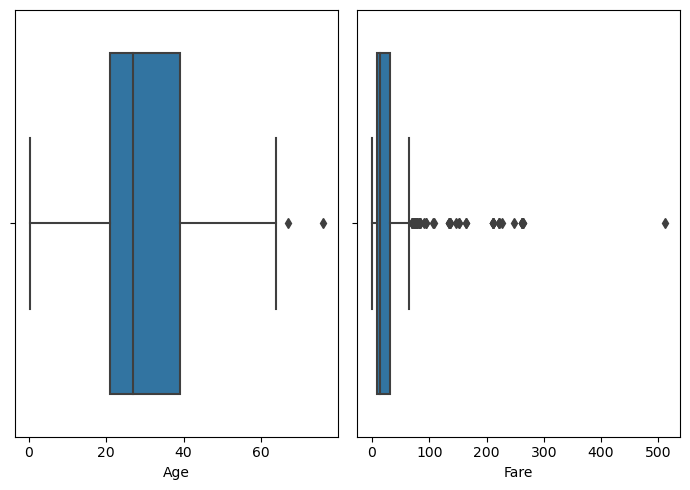

In [10]:
num_vars=['Age','Fare'] 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x=var, data=test,ax=axs[i])
    
fig.tight_layout()
    
plt.show()

# Limpieza set de datos test

In [11]:
#por cantidad de nulos se elimna variable cabin
test.drop(['Cabin'],axis=1, inplace=True)

In [12]:
df_num=test[['Age','Fare']]

In [13]:
from sklearn.impute import KNNImputer

In [14]:
#se aplica imputador knn para la var edad, viendo su histograma y boxplot no esta muy sesgado hacia los extremos, 
#podria haberse reemplazado tb por la media
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(df_num)
df_num = imputer.transform(df_num)

In [15]:
df_num=pd.DataFrame(df_num,columns=['Age','Fare'])

In [16]:
test.drop(['Age','Fare'],axis=1, inplace=True)

In [17]:
test=pd.concat([test, df_num], axis=1)

In [18]:
#test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [19]:
test.isnull().sum(axis=0) #se comprueba que ya no existen nulos

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Age            0
Fare           0
dtype: int64

In [20]:
test.describe()
#la distribucion de age no cambia drasticamente con la imputacion

,PassengerId,Pclass,SibSp,Parch,Age,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.447368,0.392344,29.702225,35.848184
std,120.810458,0.841838,0.896760,0.981429,12.888177,56.022997
min,892.000000,1.000000,0.000000,0.000000,0.170000,0.000000
25%,996.250000,1.000000,0.000000,0.000000,22.000000,7.895800
50%,1100.500000,3.000000,0.000000,0.000000,27.000000,14.454200
75%,1204.750000,3.000000,1.000000,0.000000,36.000000,31.500000
max,1309.000000,3.000000,8.000000,9.000000,76.000000,512.329200


In [21]:
test.head()
#base de datos test limpia

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
0,892,3,"Kelly, Mr. James",male,0,0,330911,Q,34.5,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S,47.0,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q,62.0,9.6875
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,S,27.0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,S,22.0,12.2875


Se aplica one hot encoding para transformar variables categoricas a etiquetas numericas. Con esto tendrian una distribucion mas cercana a una normal

In [22]:
#se aplica esto para sex y embarked, por que cabin fue dropeada y name y ticket podrian ser identificadores unicos, no serviran
#para estimar.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['Sex']= label_encoder.fit_transform(test['Sex'])
test['Embarked']= label_encoder.fit_transform(test['Embarked'])

In [23]:
test.shape

(418, 10)

In [24]:
test

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
0,892,3,"Kelly, Mr. James",1,0,0,330911,1,34.5,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,2,47.0,7.0000
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,1,62.0,9.6875
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,2,27.0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,2,22.0,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0,0,A.5. 3236,2,25.4,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,0,0,PC 17758,0,39.0,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",1,0,0,SOTON/O.Q. 3101262,2,38.5,7.2500
416,1308,3,"Ware, Mr. Frederick",1,0,0,359309,2,25.4,8.0500


In [25]:
test_original=test

# Analisis de set de datos Train

In [26]:
path="train.csv"

In [27]:
train = pd.read_csv(path) 

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

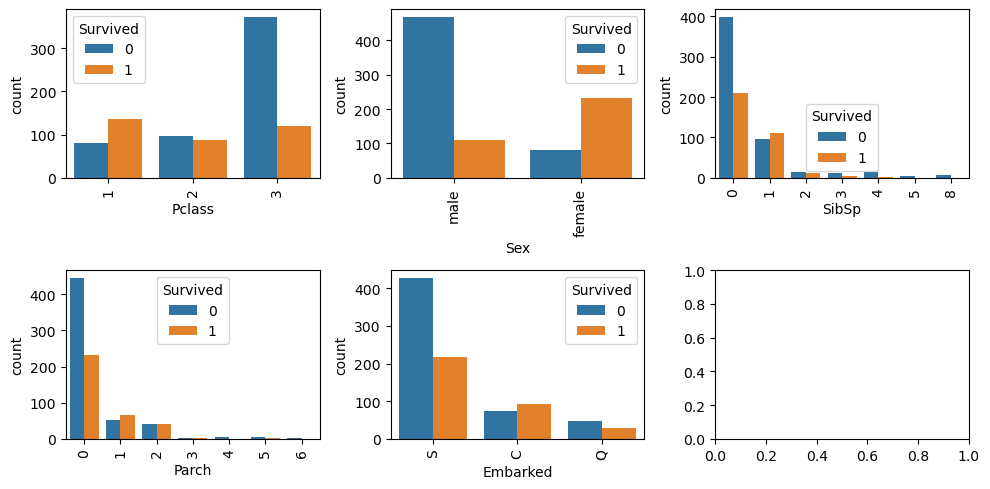

In [32]:
#analisis antes de limpieza de las que deberian ser categoricas y las actualmente son object, a excepcion de name, ticket y cabin

cat_var=['Pclass','Sex', 'SibSp', 'Parch', 'Embarked'] 

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.countplot(x=var, data=train, hue='Survived',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  
    #abs_values = train[var].value_counts(ascending=False).values

    #axs.bar_label(container=ax.containers[0], labels=abs_values)
    
fig.tight_layout()
plt.show()

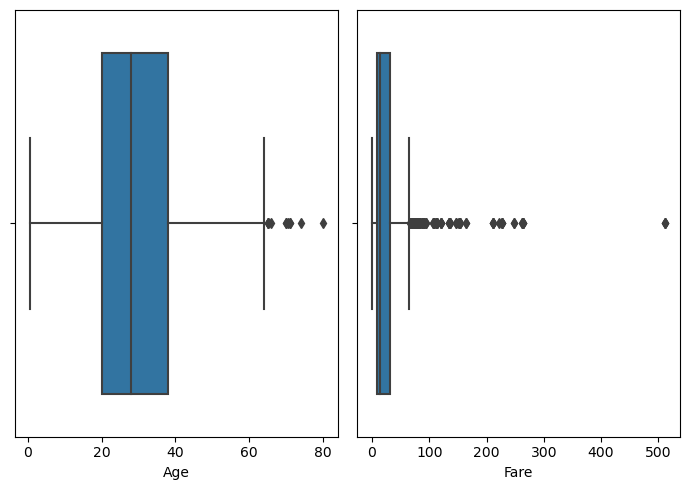

In [33]:
num_vars=['Age','Fare'] 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x=var, data=train,ax=axs[i])
    
fig.tight_layout()
    
plt.show()

<AxesSubplot:ylabel='Frequency'>

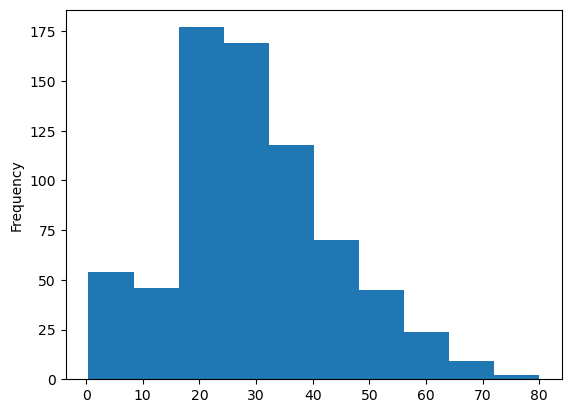

In [34]:
train['Age'].plot(kind='hist')

In [35]:
#se quiere extraer solo la letra de cabina, para comparar con precio, pero hay filas/pasajero con varias cabinas, 
#se comprueba que tengan la misma letra de cabina, los que tienen mas de 1 cabina
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
c=train['Cabin'][1][0]
c

'C'

In [37]:
train2=train.copy()

In [38]:
train2.dropna(inplace=True)

In [39]:
train2['letter_cabin']=[palabra [0] for palabra in train2['Cabin']]

In [40]:
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,letter_cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C


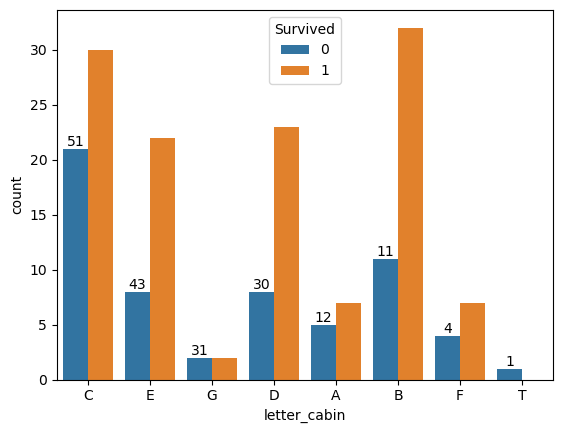

In [41]:
ax=sns.countplot(x='letter_cabin', data=train2, hue='Survived')
abs_values = train2['letter_cabin'].value_counts(ascending=False).values


ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

<AxesSubplot:xlabel='letter_cabin'>

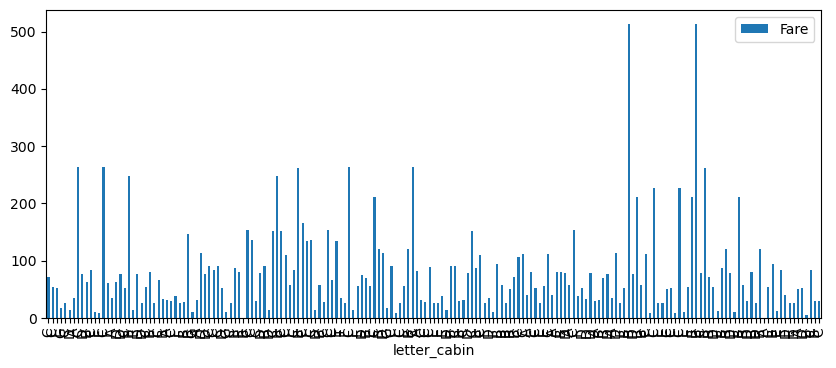

In [42]:
train2.plot(x='letter_cabin',kind='bar', y=['Fare'],figsize=(10, 4))
#no se ve una relacion entre cabina y precio, como para rellenar nulos

# Limpieza de set de datos train

In [43]:
#por cantidad de nulos se elimna variable cabin
train.drop(['Cabin'],axis=1, inplace=True)

In [44]:
df_num=train[['Age','Fare']]

In [45]:
from sklearn.impute import KNNImputer

In [46]:
#se aplica imputador knn para la var edad, viendo su histograma y boxplot no esta muy sesgado hacia los extremos, podria haberse reemplazado tb por la media
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(df_num)
df_num = imputer.transform(df_num)

In [47]:
df_num=pd.DataFrame(df_num,columns=['Age','Fare'])

In [48]:
train.drop(['Age','Fare'],axis=1, inplace=True)

In [49]:
train=pd.concat([train, df_num], axis=1)

In [50]:
#se reemplaza los nulos de embarked por moda
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [51]:
train.isnull().sum(axis=0) #se comprueba que ya no existen nulos

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Age            0
Fare           0
dtype: int64

In [52]:
train.describe()
#la distribucion de age no cambia drasticamente con la imputacion

,PassengerId,Survived,Pclass,SibSp,Parch,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,29.638278,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,13.357812,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,22.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,36.400000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,80.000000,512.329200


In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,35.0,8.0500


# Analisis exploratorio

Con datos limpios del set de datos de entrenamiento, se realiza un analisis exploratorio

In [54]:
#se cambian los tipos de datos
train['Pclass'] = train['Pclass'].astype(str)
train['Survived'] = train['Survived'].astype(str)
train['SibSp'] = train['SibSp'].astype(str)
train['Parch'] = train['Parch'].astype(str)
train['PassengerId'] = train['PassengerId'].astype(str)
#no olvidar ejecutar despues de ver nulos, si no no los encuentra

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    object 
 6   Parch        891 non-null    object 
 7   Ticket       891 non-null    object 
 8   Embarked     891 non-null    object 
 9   Age          891 non-null    float64
 10  Fare         891 non-null    float64
dtypes: float64(2), object(9)
memory usage: 76.7+ KB


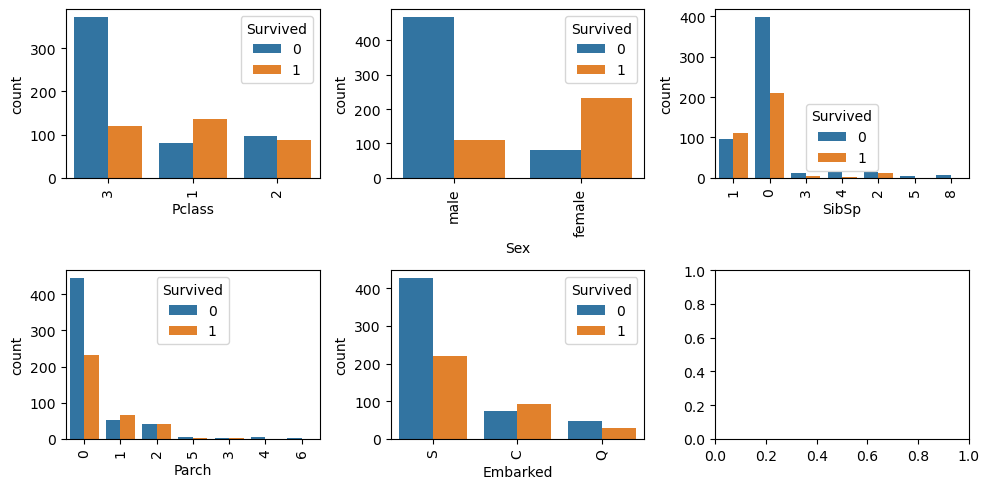

In [56]:

cat_var=['Pclass','Sex', 'SibSp', 'Parch', 'Embarked'] 

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.countplot(x=var, data=train, hue='Survived',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  
    #abs_values = train[var].value_counts(ascending=False).values

    #axs.bar_label(container=ax.containers[0], labels=abs_values)
    
fig.tight_layout()
plt.show()

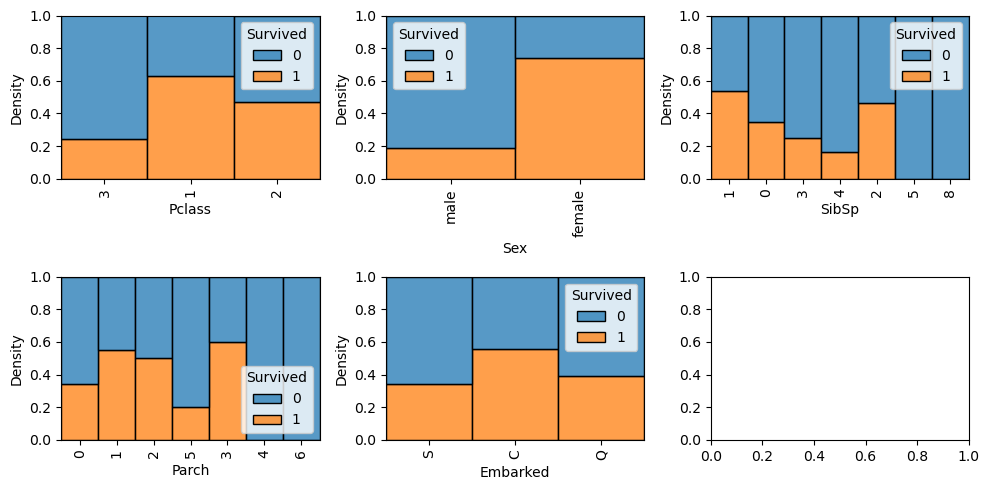

In [57]:
cat_var=['Pclass','Sex', 'SibSp', 'Parch', 'Embarked']
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.histplot(x=var,hue='Survived', data=train,ax=axs[i],
                 multiple = "fill",
                 kde = False, element = "bars", fill= True, 
                 stat = "density"
                )
    axs[i].set_xticklabels(train[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show()

#se vio que habia mas gente en 3ra clase, mas hombres y mas gente que embarco en Southampton (S), sin embargo,
#proporcionalmente hablando mas mujeres se salvaron, también mas personas de 1ra clase y más personas que embarcaron en
# Cherbourg (C) se salvaron.


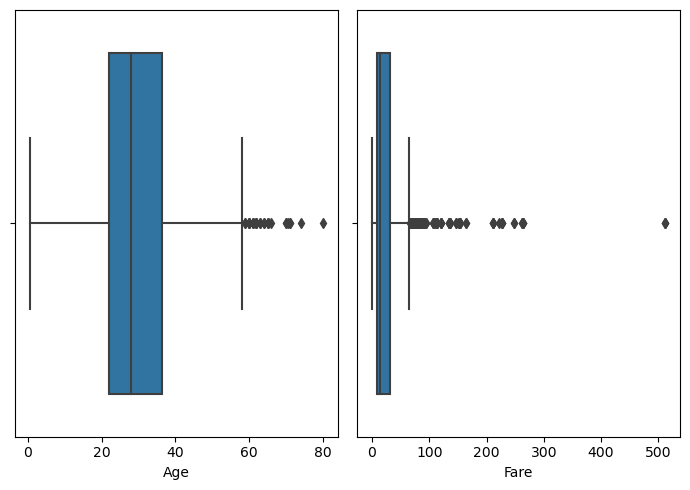

In [58]:
num_vars=['Age','Fare'] 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x=var, data=train,ax=axs[i])
    
fig.tight_layout()
    
plt.show()
#ambos muestran outliers, pero Fare tiene mas

In [59]:
#se vuelven a codificar como numericas para aplicar los algoritmos
train['Pclass'] = train['Pclass'].astype(int)
train['Survived'] = train['Survived'].astype(int)
train['SibSp'] = train['SibSp'].astype(int)
train['Parch'] = train['Parch'].astype(int)

In [60]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

Se aplica one hot encoding para transformar variables categoricas a etiquetas numericas. Con esto tendrian una distribucion mas cercana a una normal

In [61]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Sex']= label_encoder.fit_transform(train['Sex'])
train['Embarked']= label_encoder.fit_transform(train['Embarked'])

In [62]:
train['Sex'].unique()

array([1, 0])

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,2,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,0,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,2,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2,35.0,8.0500


0    549
1    342
Name: Survived, dtype: int64

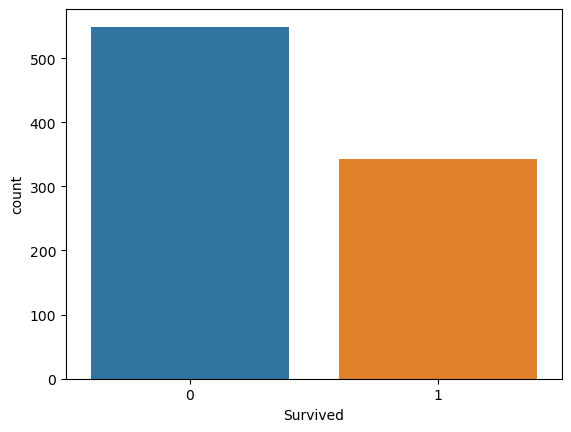

In [64]:
#se analiza el balanceado de etiquetas
sns.countplot(train['Survived'])
train['Survived'].value_counts()

In [65]:
# si bien se ve que la base tiene un 61% (no) vs (39%) si, se decide balancear
from sklearn.utils import resample

df_majority=train[(train['Survived']==0)] 
df_minority=train[(train['Survived']==1)]

# muestreo ascendente de la clase minoritaria
df_minority_unsampled=resample(df_minority, 
                              replace=True, 
                              n_samples=549, 
                              random_state=0) 

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria 
df_upsampled=pd.concat([df_minority_unsampled,df_majority]) #junta tablas
df_upsampled.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
443,444,1,2,"Reynaldo, Ms. Encarnacion",0,0,0,230434,2,28.0,13.0000
128,129,1,3,"Peter, Miss. Anna",0,1,1,2668,0,17.6,22.3583
315,316,1,3,"Nilsson, Miss. Helmina Josefina",0,0,0,347470,2,26.0,7.8542
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",0,1,0,36947,0,54.0,78.2667
839,840,1,1,"Marechal, Mr. Pierre",1,0,0,11774,0,33.6,29.7000


1    549
0    549
Name: Survived, dtype: int64

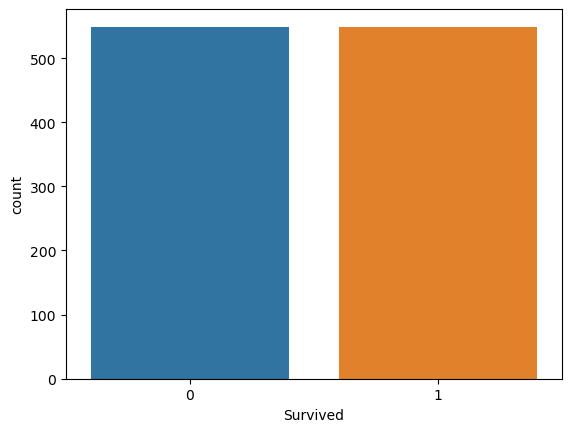

In [66]:
#despues del balanceo
sns.countplot(df_upsampled['Survived'])
df_upsampled['Survived'].value_counts()

In [67]:
df_upsampled.shape

(1098, 11)

In [68]:
#se eliminan outliers de var numericas, con esto se pareceran mas a una normal
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check = num_vars

# Solicitar la función que remueve los outliers usando IQR
train_limpio = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
train_limpio.head()


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
443,444,1,2,"Reynaldo, Ms. Encarnacion",0,0,0,230434,2,28.0,13.0000
128,129,1,3,"Peter, Miss. Anna",0,1,1,2668,0,17.6,22.3583
315,316,1,3,"Nilsson, Miss. Helmina Josefina",0,0,0,347470,2,26.0,7.8542
839,840,1,1,"Marechal, Mr. Pierre",1,0,0,11774,0,33.6,29.7000
643,644,1,3,"Foo, Mr. Choong",1,0,0,1601,2,29.6,56.4958


In [69]:
train_limpio.shape
#la base no reduce sustansialmente despues de quitar outliers (gracias al balanceo)

(923, 11)

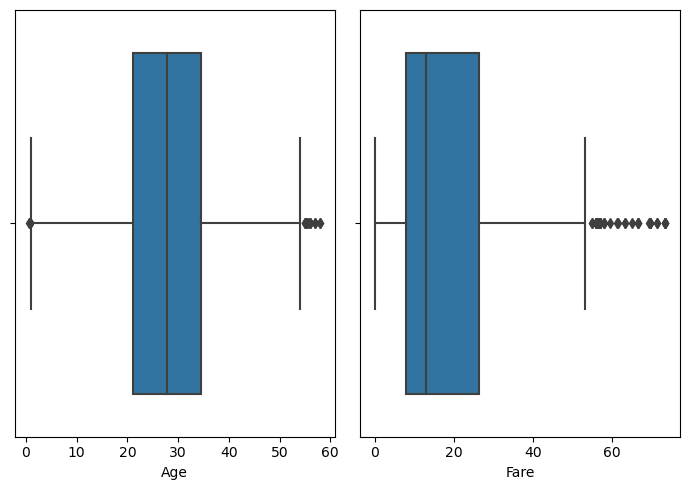

In [70]:
#despues de haber quitado outliers, donde se evidencia una distribucion mas uniforme de fare
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x=var, data=train_limpio,ax=axs[i])
    
fig.tight_layout()
    
plt.show()

In [71]:
train_limpio = train_limpio.reset_index(drop=True)

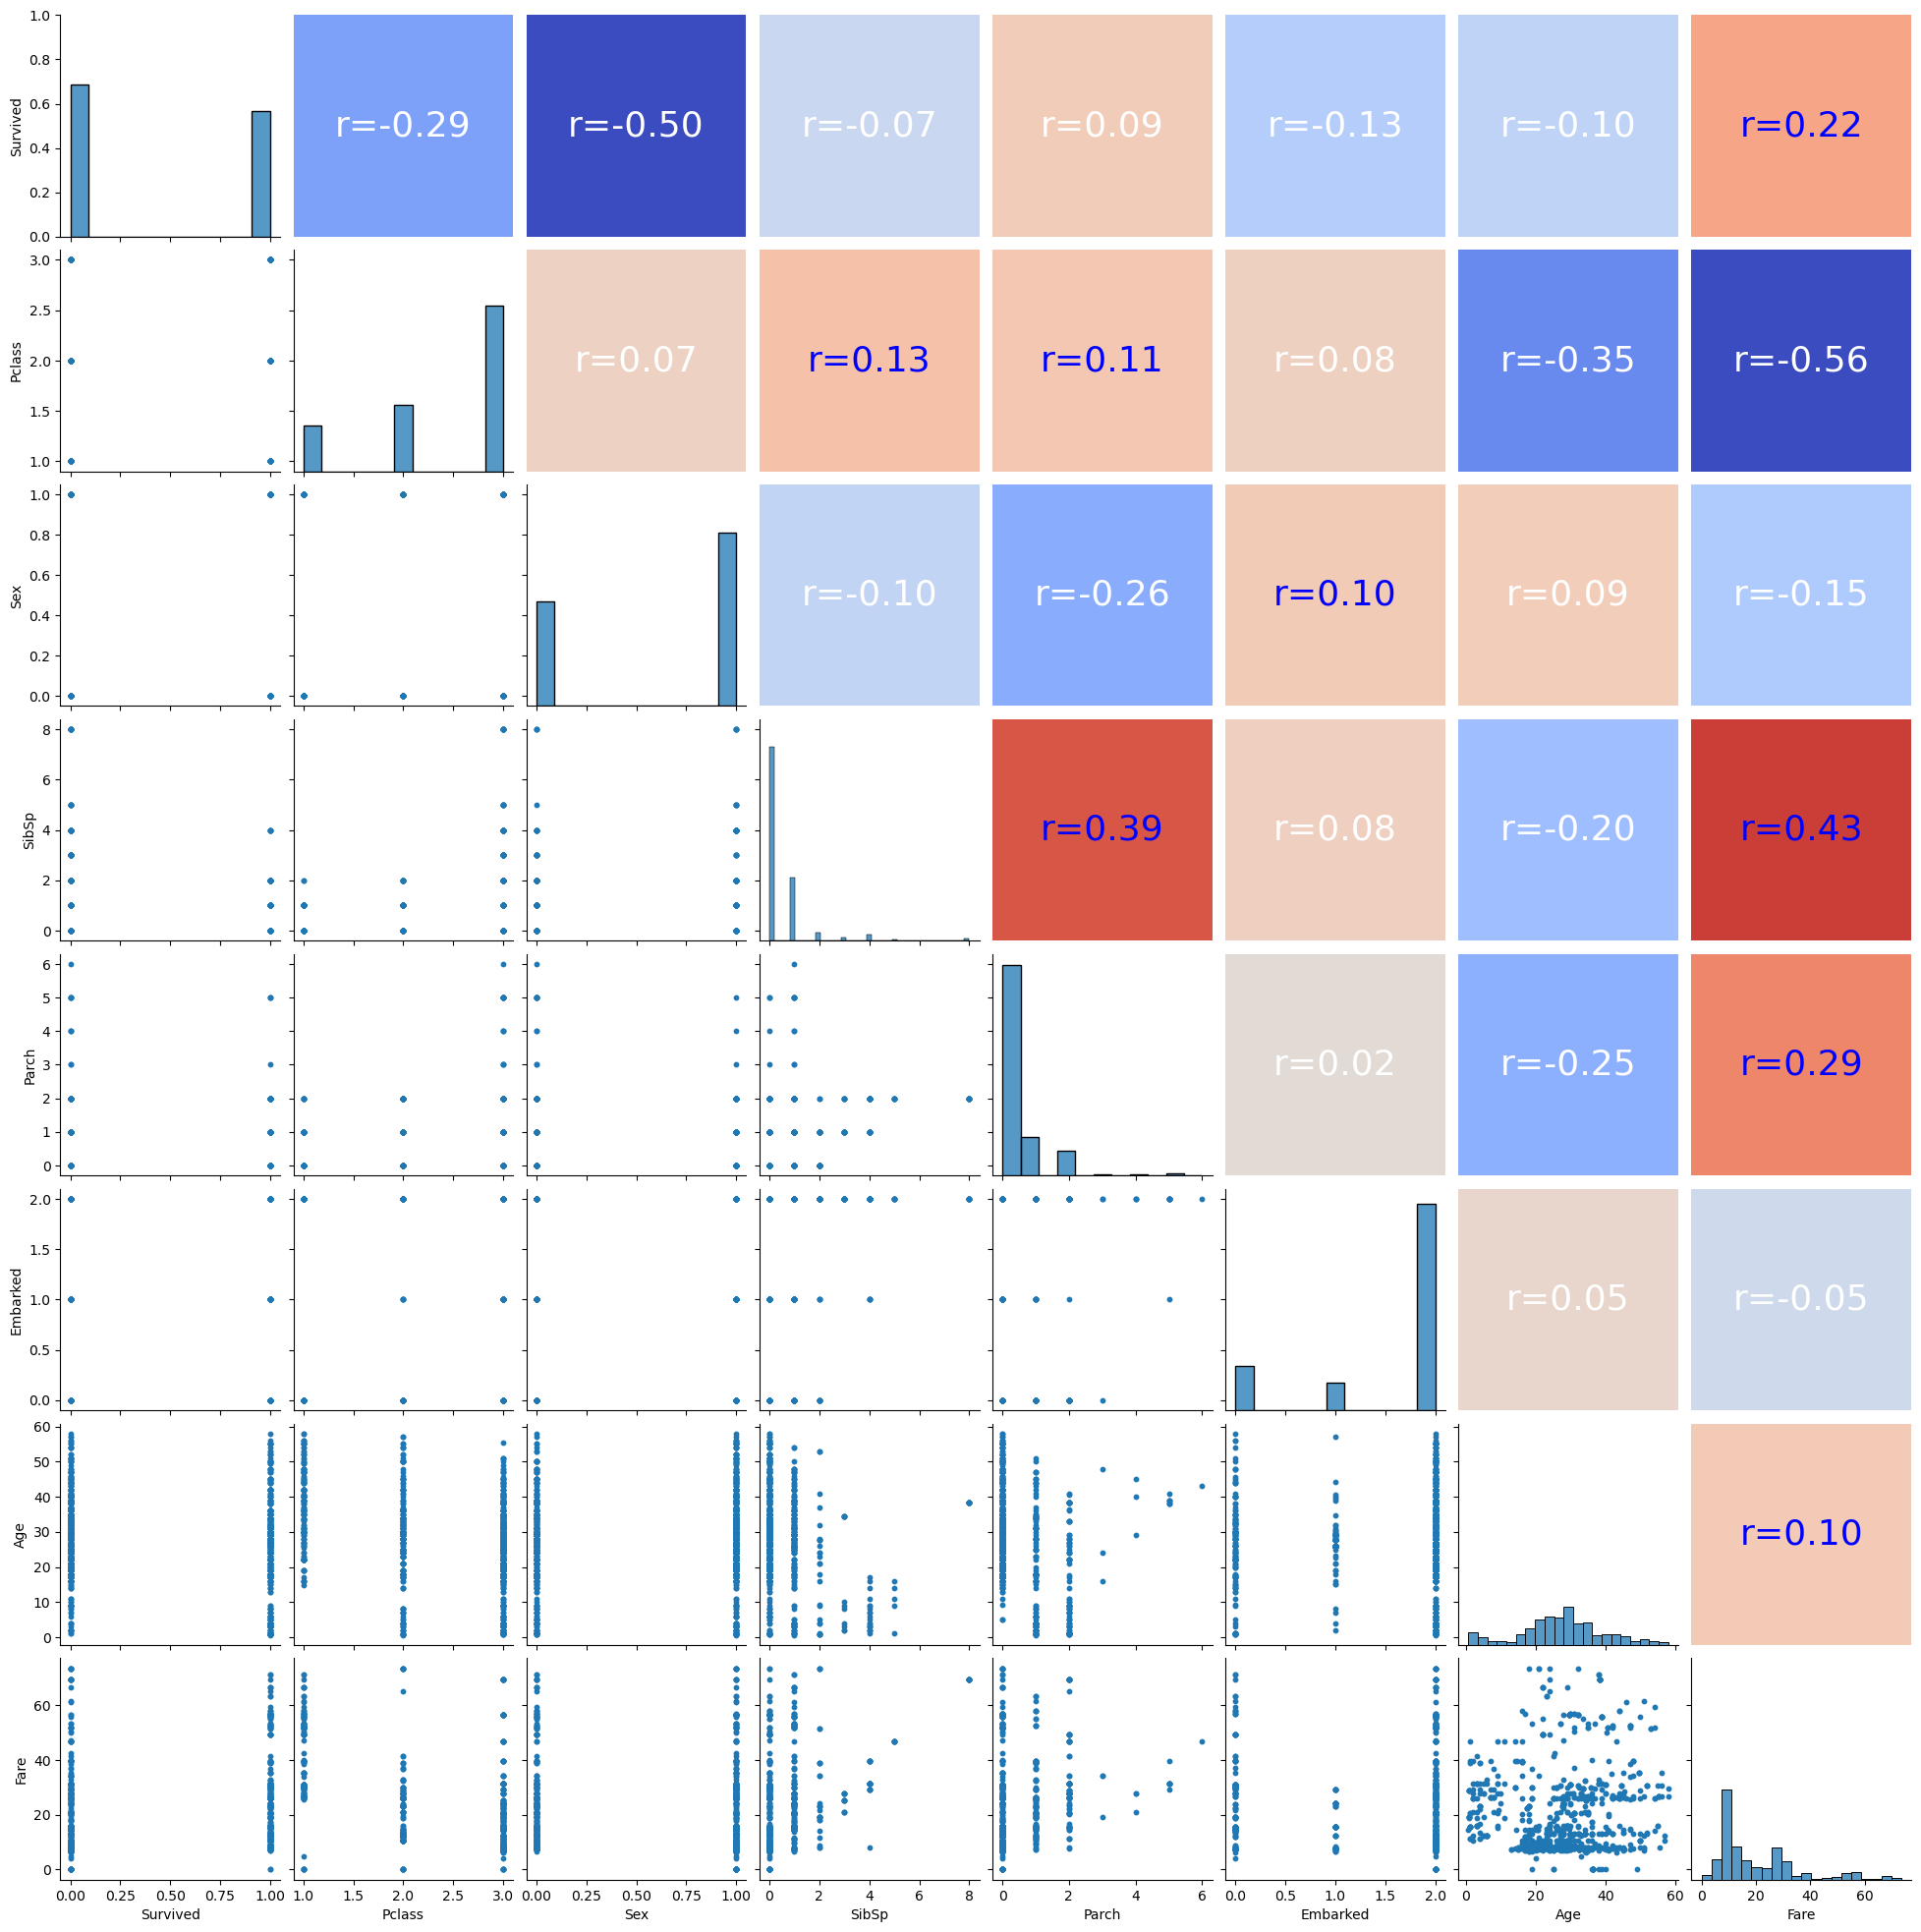

In [72]:
#no se evidencia alguna correlacion alta entre var independientes y la var a predecir
from scipy.stats import pearsonr
def corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    
    lightness = (max(facecolor[:3]) + min(facecolor[:3]) ) / 2
    
    ax.annotate(f"r={r:.2f}", 
                xy=(.5, .5), 
                xycoords=ax.transAxes,
                color='white' if r < 0.1 else 'blue', #text color
                size=26, 
                ha='center', 
                va='center'
                )

g = sns.PairGrid(train_limpio) #para crear la matriz de graficos 

g.map_lower(plt.scatter, 
            s=10) #grafica las dispersiones en el triangulo inferior

g.map_diag(sns.histplot, 
           kde=False) #muestra los graficos de barras en la diogonal

g.map_upper(corrfunc, 
            cmap=plt.get_cmap('coolwarm'), #https://matplotlib.org/stable/tutorials/colors/colormaps.html
            norm=plt.Normalize(vmin=-0.5, vmax=0.5)
          ) #muestra los valores de r en triangulo superior

g.fig.subplots_adjust(wspace=0.06, hspace=0.06) # equal spacing in both directions
plt.show()

## REGRESION LOGISTICA

Definiendo vector de características (X) y variable target (y)

In [73]:
# se divide el set de entrenamiento en 2 por que el set de testeo que se otorga no tiene una var de respuesta Y, para asignar un y_test
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

In [75]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [76]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [77]:
y_pred = LR.predict(X_test)
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.78


In [78]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7761732851985559
Precision Score :  0.776173285198556
Recall Score :  0.776173285198556
Jaccard Score :  0.6342182890855457


In [79]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       146
           1       0.76      0.78      0.77       131

    accuracy                           0.78       277
   macro avg       0.78      0.78      0.78       277
weighted avg       0.78      0.78      0.78       277



<Figure size 900x900 with 0 Axes>

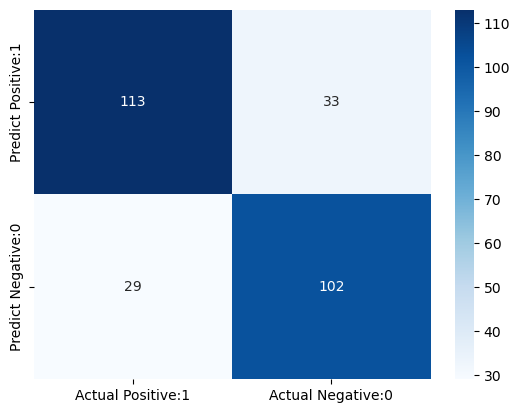

<Figure size 900x900 with 0 Axes>

In [80]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [81]:
# sacar las probabilidades
y_pred_prob = LR.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

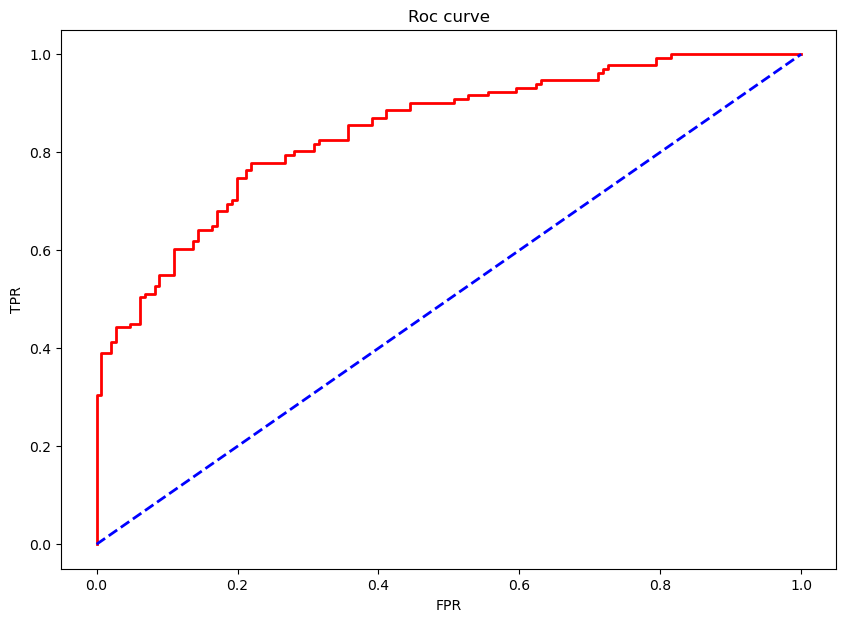

In [82]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [83]:
# Esta es una regresión, por lo que tiene coeficientes

print('Intercept: ' + str(LR.intercept_))
print('Coefficients: ')
summary = pd.DataFrame([X_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

Intercept: [5.15920879]
Coefficients: 


,Variable,Coefficient
6,Fare,0.022153
3,Parch,-0.033182
5,Age,-0.054946
4,Embarked,-0.130553
2,SibSp,-0.522011
0,Pclass,-0.918371
1,Sex,-2.477636


## NAIVE BAYES

ALGORITMO GAUSSIAN

In [84]:
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
y_pred = gnb.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.78
Precisión en el set de Test: 0.78


In [88]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7761732851985559
Precision Score :  0.776173285198556
Recall Score :  0.776173285198556
Jaccard Score :  0.6342182890855457


In [89]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       146
           1       0.73      0.84      0.78       131

    accuracy                           0.78       277
   macro avg       0.78      0.78      0.78       277
weighted avg       0.78      0.78      0.78       277



<Figure size 900x900 with 0 Axes>

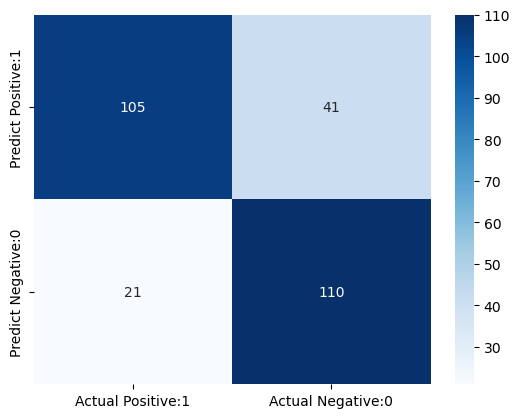

<Figure size 900x900 with 0 Axes>

In [90]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [91]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

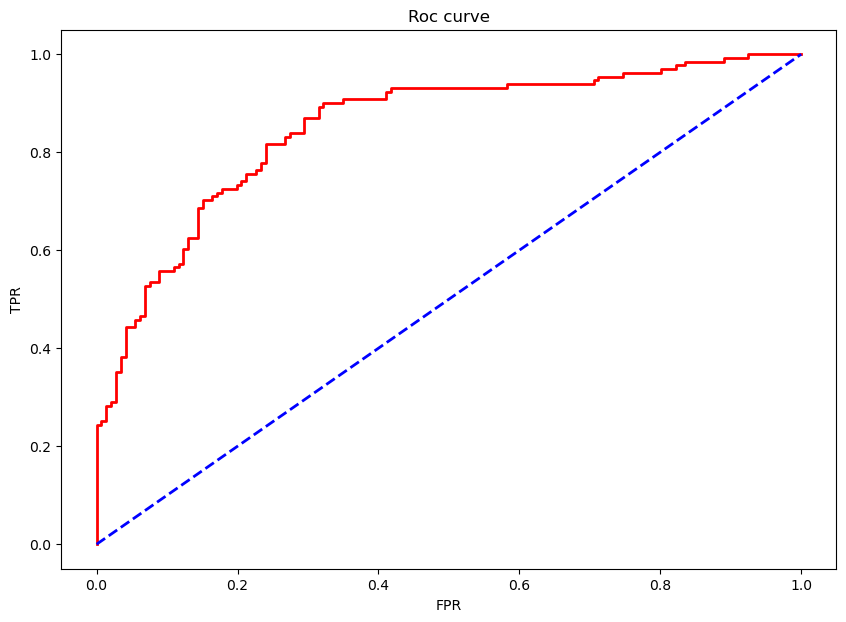

In [92]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

ALGORITMO MULTINOMIAL

In [93]:
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

In [95]:
from sklearn.naive_bayes import MultinomialNB
Mult = MultinomialNB()
Mult.fit(X_train, y_train) 
y_pred = Mult.predict(X_test)

In [96]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Mult.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.65
Precisión en el set de Test: 0.68


In [97]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.6787003610108303
Precision Score :  0.6787003610108303
Recall Score :  0.6787003610108303
Jaccard Score :  0.5136612021857924


In [98]:
print (classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       146
           1       0.69      0.58      0.63       131

    accuracy                           0.68       277
   macro avg       0.68      0.67      0.67       277
weighted avg       0.68      0.68      0.68       277



<Figure size 900x900 with 0 Axes>

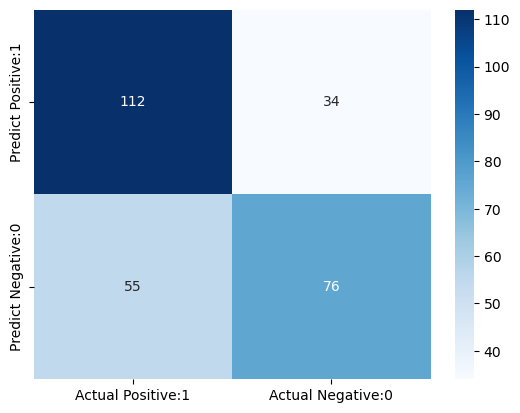

<Figure size 900x900 with 0 Axes>

In [99]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [100]:
# sacar las probabilidades
y_pred_prob = Mult.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

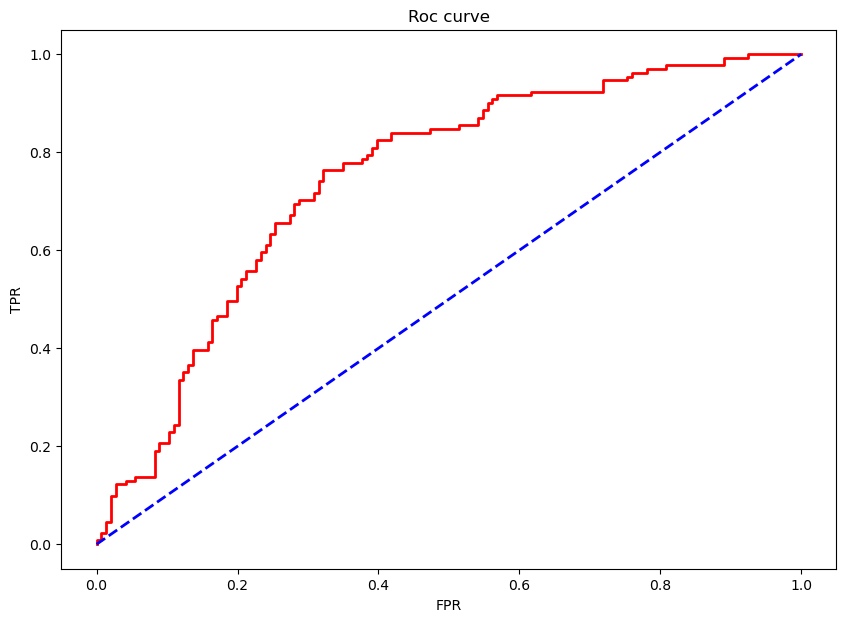

In [101]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

## KNN

In [102]:
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')
#primero se elige un vecindario de 3 para despues encontrar el optimo en gráfico

In [105]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [106]:
y_pred=knn.predict(X_test)

In [107]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.74


In [108]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7436823104693141
Precision Score :  0.7436823104693141
Recall Score :  0.7436823104693141
Jaccard Score :  0.5919540229885057


In [109]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.74       146
           1       0.71      0.79      0.74       131

    accuracy                           0.74       277
   macro avg       0.75      0.75      0.74       277
weighted avg       0.75      0.74      0.74       277



<Figure size 900x900 with 0 Axes>

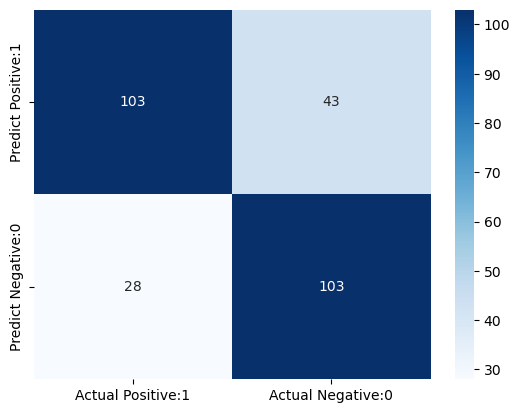

<Figure size 900x900 with 0 Axes>

In [110]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
                                  


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [111]:
# sacar las probabilidades
y_pred_prob = knn.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

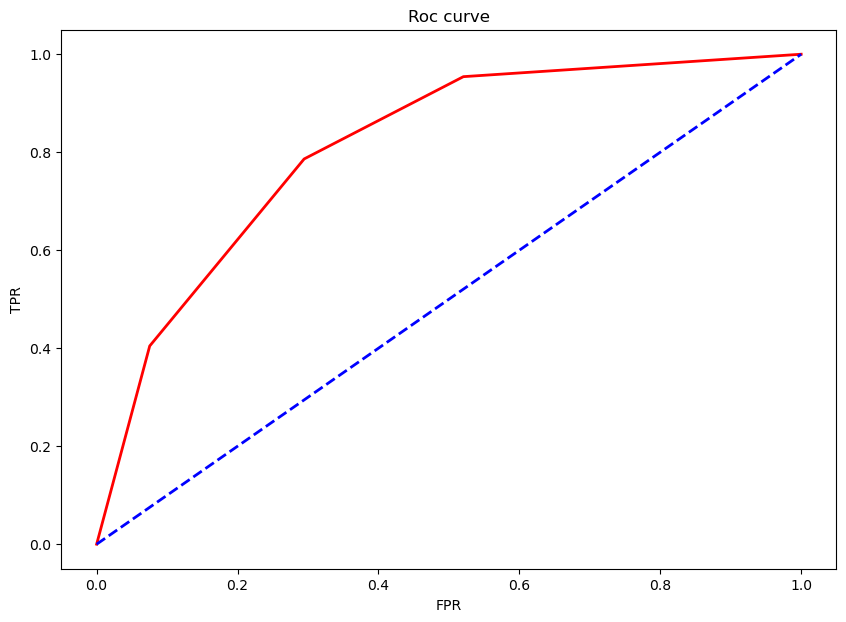

In [112]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Delimitar el valor de K:

In [113]:
vecinos=np.arange(1,20)
vecinos 
#no se genera un array mas grande, por que las inflexiones (codo) ya se logran ver dentro de los 20.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [114]:
train_ex =np.empty(len(vecinos))

In [115]:
for i, k in enumerate(vecinos):
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit(X_train, y_train)
    train_ex[i] = knn.score(X_train, y_train)

In [116]:
train_ex

array([0.97832817, 0.90402477, 0.86687307, 0.82817337, 0.80495356,
       0.78947368, 0.76625387, 0.74922601, 0.74458204, 0.74613003,
       0.72600619, 0.73065015, 0.72600619, 0.73065015, 0.73374613,
       0.73684211, 0.72600619, 0.73219814, 0.7244582 ])

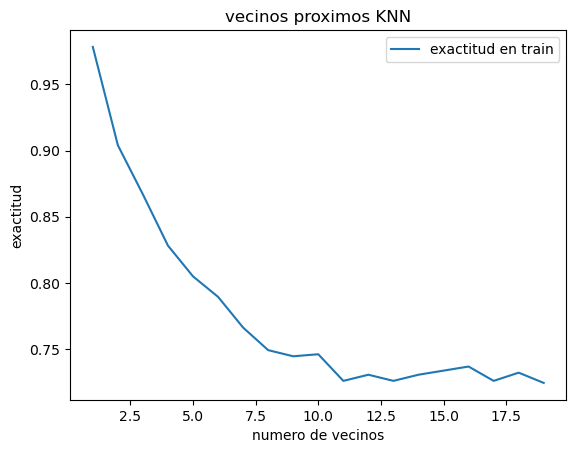

In [117]:
plt.title("vecinos proximos KNN")
plt.plot(vecinos, train_ex, label = "exactitud en train")
plt.legend()
plt.xlabel("numero de vecinos")
plt.ylabel("exactitud")
plt.show() 


# DECISION TREE

In [118]:
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

CLF Gini

In [120]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [121]:
y_pred_gini = clf_gini.predict(X_test)

In [122]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.81
Precisión en el set de Test: 0.80


In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_gini, average='micro')))

F-1 Score :  0.8014440433212996
Precision Score :  0.8014440433212996
Recall Score :  0.8014440433212996
Jaccard Score :  0.6686746987951807


In [124]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       146
           1       0.75      0.86      0.80       131

    accuracy                           0.80       277
   macro avg       0.81      0.80      0.80       277
weighted avg       0.81      0.80      0.80       277



<Figure size 900x900 with 0 Axes>

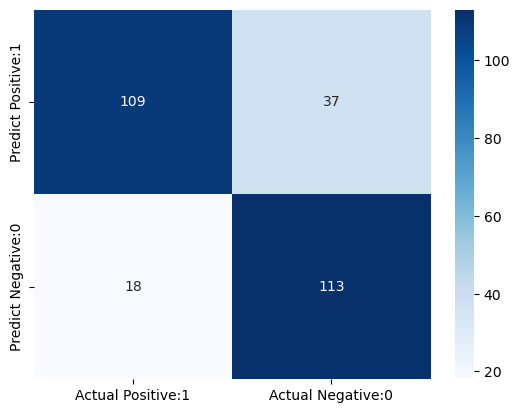

<Figure size 900x900 with 0 Axes>

In [125]:
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [126]:
from sklearn import tree
import graphviz 
import pydotplus
%matplotlib inline

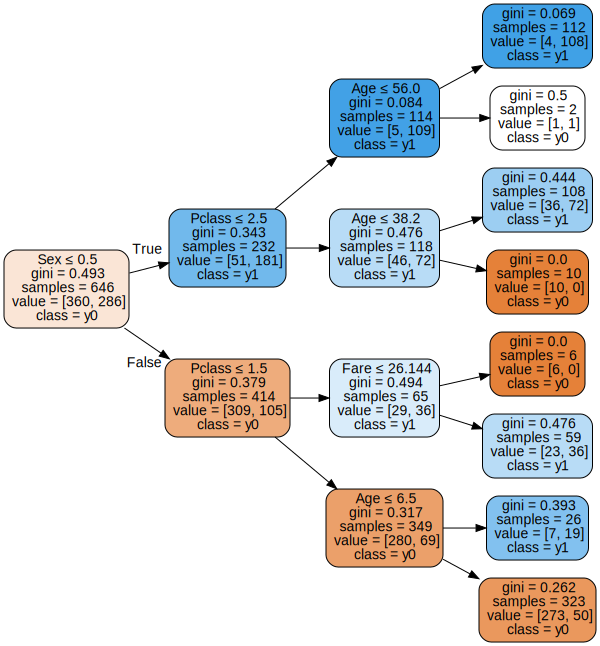

In [127]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=X_train.columns,  
                                class_names=True,  
                                filled=True, rotate=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph


In [128]:
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

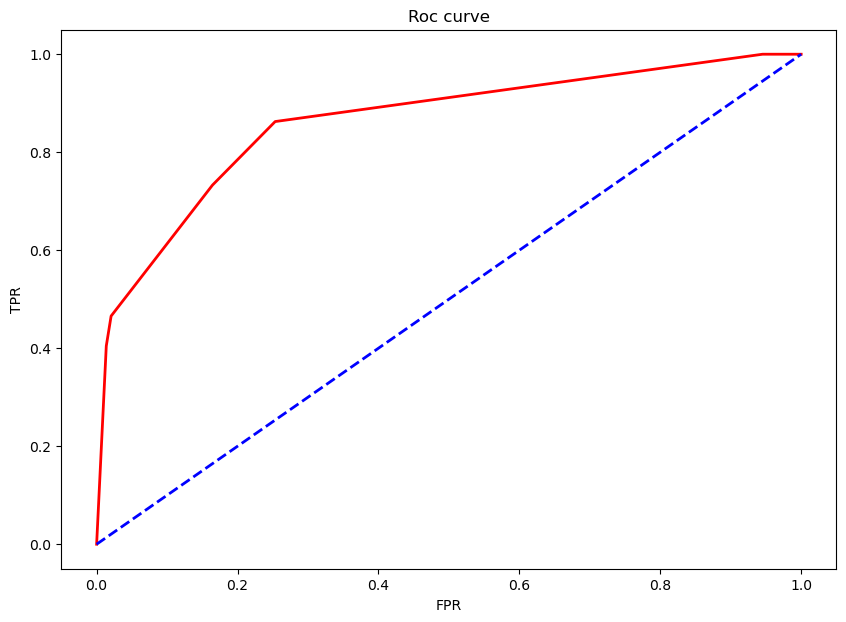

In [129]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Gini entropy

In [130]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [131]:
y_pred_en = clf_en.predict(X_test)

In [132]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_en.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.81
Precisión en el set de Test: 0.80


In [133]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_en, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_en, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_en, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_en, average='micro')))

F-1 Score :  0.8014440433212996
Precision Score :  0.8014440433212996
Recall Score :  0.8014440433212996
Jaccard Score :  0.6686746987951807


In [134]:
print (classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       146
           1       0.75      0.86      0.80       131

    accuracy                           0.80       277
   macro avg       0.81      0.80      0.80       277
weighted avg       0.81      0.80      0.80       277



<Figure size 900x900 with 0 Axes>

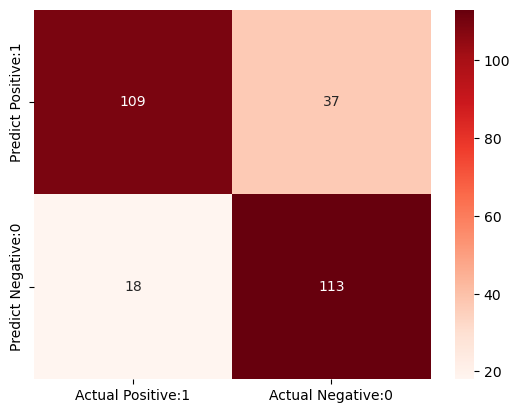

<Figure size 900x900 with 0 Axes>

In [135]:
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

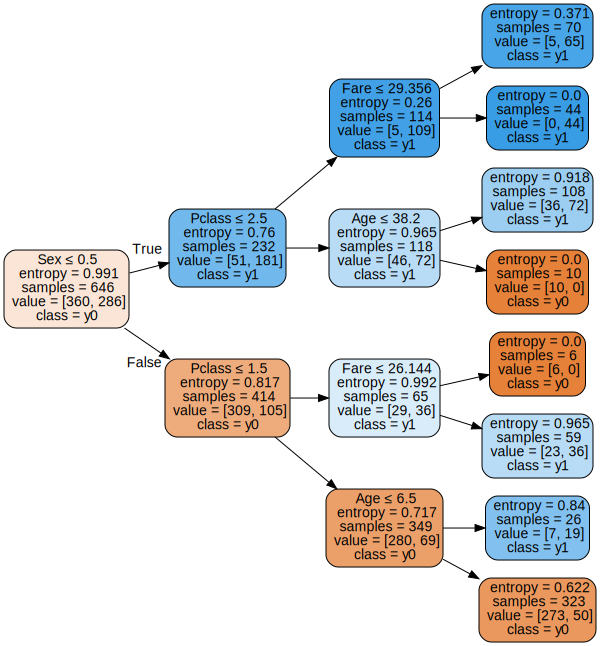

In [136]:
dot_data = tree.export_graphviz(clf_en, out_file=None, max_depth=None,
                                feature_names=X_train.columns,  
                                class_names=True,  
                                filled=True, rotate=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph 
#con criterio entropy los valores de entropy son peores, debido a que set de entrenamiento utilizado se trata solo de valores continuos

In [137]:
y_pred_prob = clf_en.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

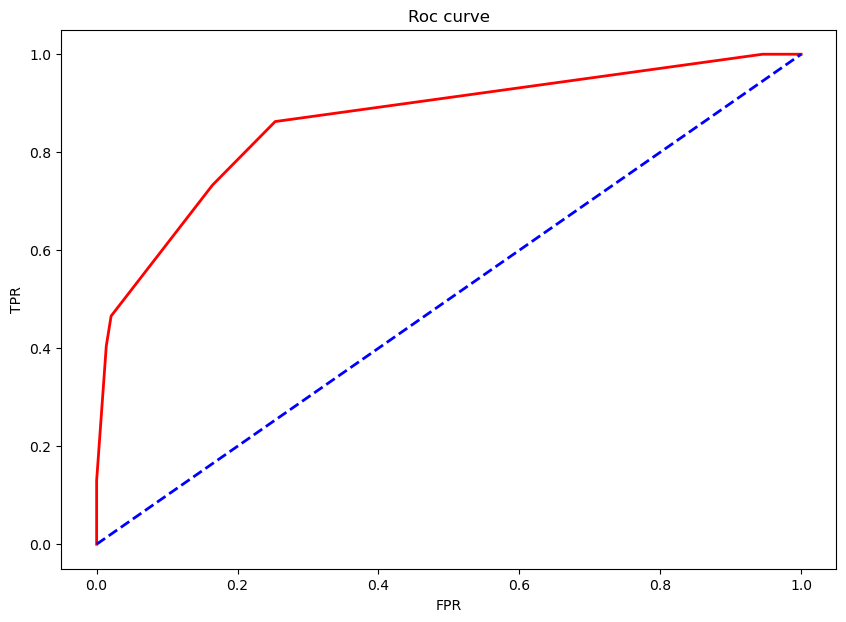

In [138]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

# RANDOM FOREST

In [139]:
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [143]:
y_pred_100 = rfc_100.predict(X_test)

In [144]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc_100.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc_100.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.99
Precisión en el set de Test: 0.88


In [145]:
print('F-1 Score : ',(f1_score(y_test, y_pred_100, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_100, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_100, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_100, average='micro')))

F-1 Score :  0.8808664259927798
Precision Score :  0.8808664259927798
Recall Score :  0.8808664259927798
Jaccard Score :  0.7870967741935484


In [146]:
print (classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       146
           1       0.84      0.93      0.88       131

    accuracy                           0.88       277
   macro avg       0.88      0.88      0.88       277
weighted avg       0.89      0.88      0.88       277



<Figure size 900x900 with 0 Axes>

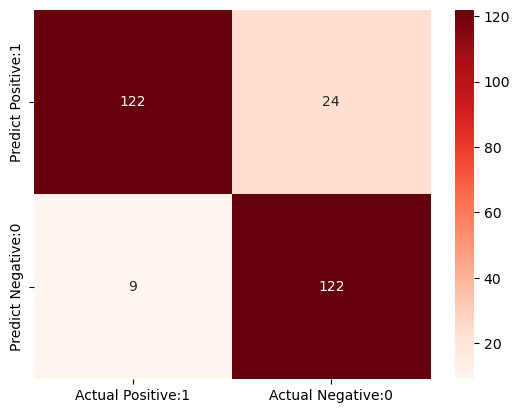

<Figure size 900x900 with 0 Axes>

In [147]:
cm = confusion_matrix(y_test, y_pred_100)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [148]:
y_pred_prob = rfc_100.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

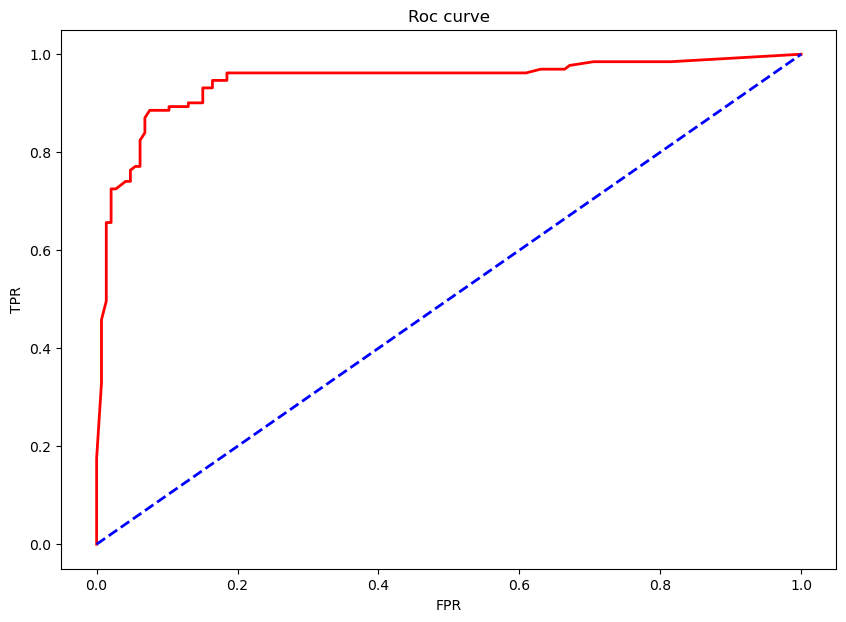

In [149]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [150]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(5)

feature_scores

Age       0.298995
Fare      0.261639
Sex       0.233906
Pclass    0.079512
SibSp     0.058198
dtype: float64

# xgboost

In [151]:
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

In [153]:
from xgboost import XGBClassifier

In [154]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [155]:
y_predxgb = xgb.predict(X_test)

In [156]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.84


In [157]:
print('F-1 Score : ',(f1_score(y_test, y_predxgb, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_predxgb, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_predxgb, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_predxgb, average='micro')))

F-1 Score :  0.8447653429602888
Precision Score :  0.8447653429602888
Recall Score :  0.8447653429602888
Jaccard Score :  0.73125


In [158]:
print (classification_report(y_test, y_predxgb))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       146
           1       0.82      0.85      0.84       131

    accuracy                           0.84       277
   macro avg       0.84      0.85      0.84       277
weighted avg       0.85      0.84      0.84       277



<Figure size 900x900 with 0 Axes>

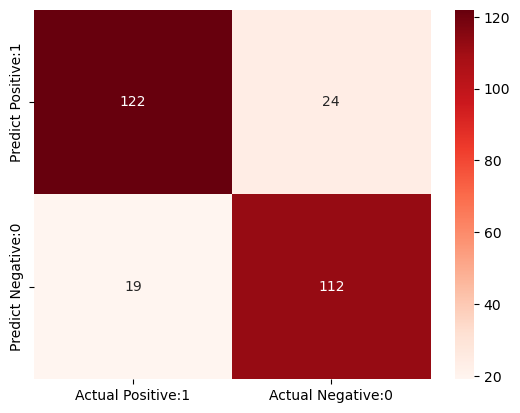

<Figure size 900x900 with 0 Axes>

In [159]:
cm = confusion_matrix(y_test, y_predxgb)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [160]:
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

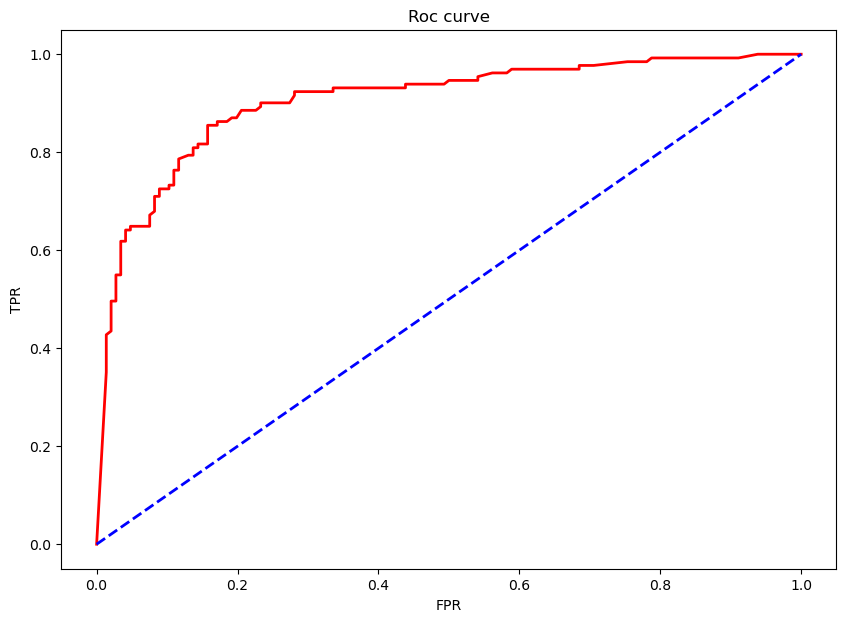

In [161]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

# SUPORT VECTOR MACHINE

In [162]:
X = train_limpio.drop(['Survived','PassengerId','Name','Ticket'], axis=1)
y = train_limpio['Survived']

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=0)

Estimación de un hiperplano lineal no óptimo:

In [164]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [165]:
y_predsvc = svc.predict(X_test)

In [166]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(svc.score(X_train, y_train)))  
print('Precisión en el set de Test: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.67
Precisión en el set de Test: 0.71


In [167]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7436823104693141


In [168]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.74       146
           1       0.71      0.79      0.74       131

    accuracy                           0.74       277
   macro avg       0.75      0.75      0.74       277
weighted avg       0.75      0.74      0.74       277



<Figure size 900x900 with 0 Axes>

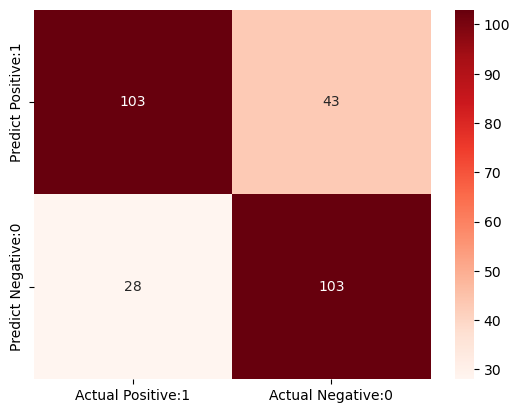

<Figure size 900x900 with 0 Axes>

In [169]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [170]:
# sacar las probabilidades
y_pred_prob = svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

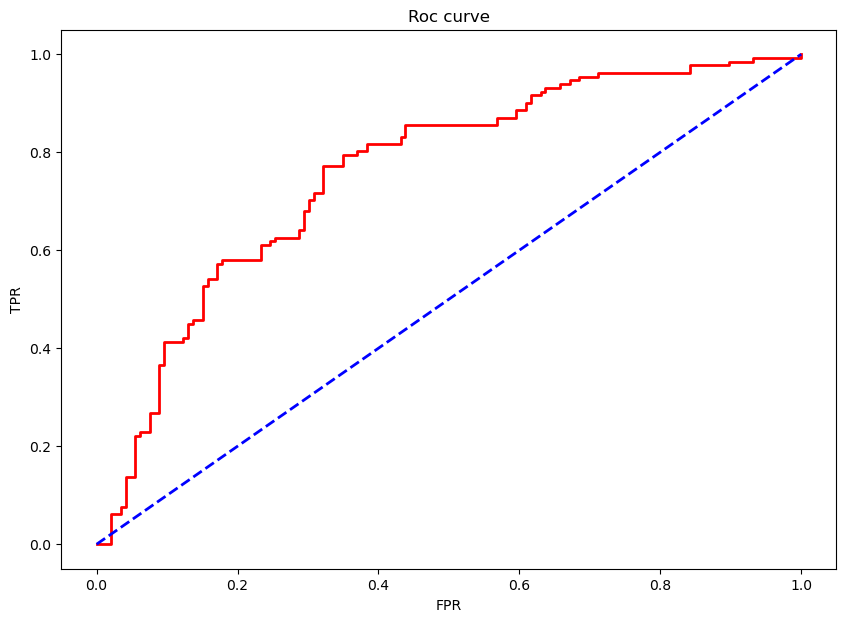

In [171]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Obtener C Grid Search:

In [172]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1, 1, 10, 100, 1000], "gamma":[1, 0.1, 0.01, 0.001, 0.0001]}

In [173]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [174]:
#mejores hiperparametros. los cuales indicarian overfitting, no serviran para modelar. No se incluyen los mismos en los modelos
grid.best_params_

{'C': 100, 'gamma': 0.001}

Estimación con kernell lineal (hiperplano lineal óptimo):

In [175]:
linear_classifier = SVC(kernel='linear', probability=True).fit(X_train,y_train)
y_predKL = linear_classifier.predict(X_test)


In [176]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(linear_classifier.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(linear_classifier.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.76
Precisión en el set de Test: 0.74


In [177]:
print('F-1 Score : ',(f1_score(y_test, y_predKL, average='micro')))

F-1 Score :  0.7436823104693141


In [178]:
print(classification_report(y_test,y_predKL))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       146
           1       0.76      0.67      0.71       131

    accuracy                           0.74       277
   macro avg       0.75      0.74      0.74       277
weighted avg       0.75      0.74      0.74       277



<AxesSubplot:>

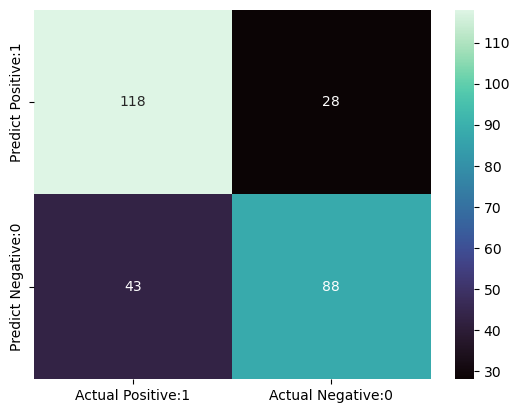

In [179]:

# Matriz de confusión para SVM Linear Kernel
cm = confusion_matrix(y_test, y_predKL)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [180]:
# sacar las probabilidades
y_pred_prob = linear_classifier.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

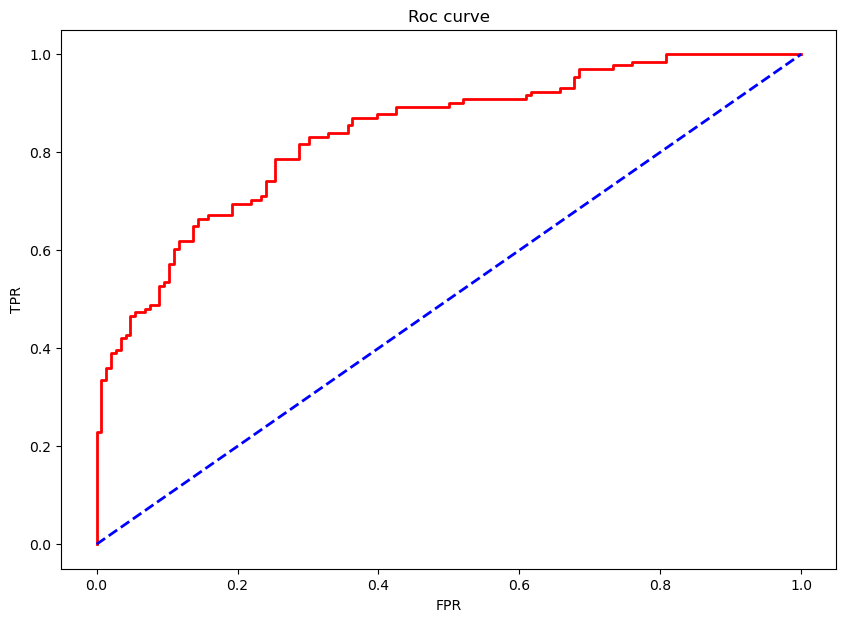

In [181]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Estimación con kernell Gaussian RBF:

In [182]:
rbf_svc=SVC(kernel='rbf',probability=True).fit(X_train,y_train)
y_predKG = rbf_svc.predict(X_test)

In [183]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rbf_svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rbf_svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.67
Precisión en el set de Test: 0.69


In [184]:
print('F-1 Score : ',(f1_score(y_test, y_predKG, average='micro')))

F-1 Score :  0.6895306859205776


In [185]:
print(classification_report(y_test,y_predKG))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       146
           1       0.69      0.63      0.66       131

    accuracy                           0.69       277
   macro avg       0.69      0.69      0.69       277
weighted avg       0.69      0.69      0.69       277



<AxesSubplot:>

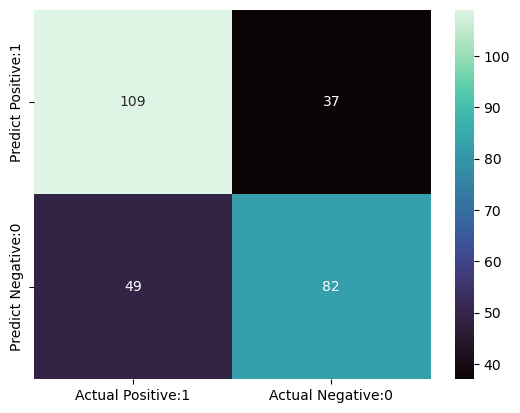

In [186]:

# Matriz de confusión
cm = confusion_matrix(y_test, y_predKG)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [187]:
# sacar las probabilidades
y_pred_prob = rbf_svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

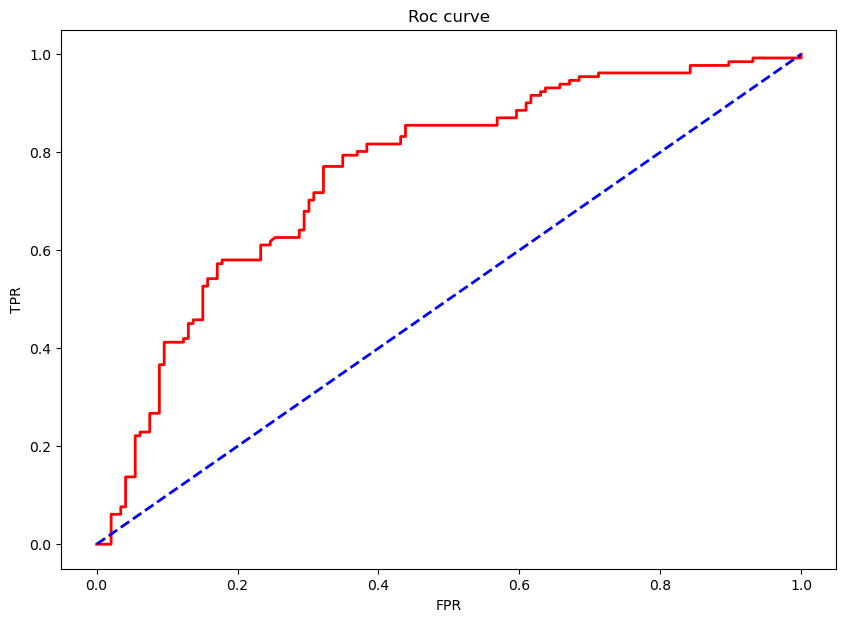

In [188]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Estimación con kernell Polynomial:

In [189]:
Poly_svc=SVC(kernel='poly',probability=True).fit(X_train,y_train) 
y_predKP = Poly_svc.predict(X_test)


In [190]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Poly_svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Poly_svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.60
Precisión en el set de Test: 0.56


In [191]:
print('F-1 Score : ',(f1_score(y_test, y_predKP, average='micro')))

F-1 Score :  0.5631768953068592


In [192]:
print(classification_report(y_test,y_predKP))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68       146
           1       0.62      0.19      0.29       131

    accuracy                           0.56       277
   macro avg       0.59      0.54      0.49       277
weighted avg       0.59      0.56      0.50       277



<AxesSubplot:>

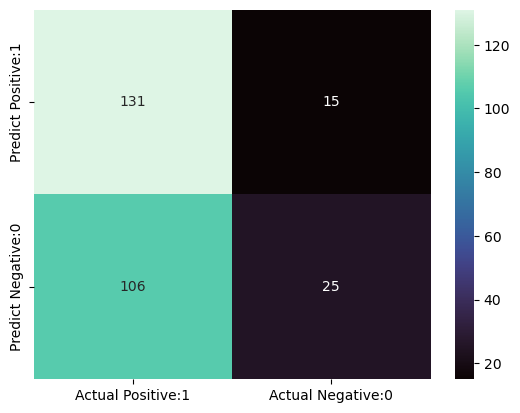

In [193]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_predKP)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [194]:
# sacar las probabilidades
y_pred_prob = Poly_svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

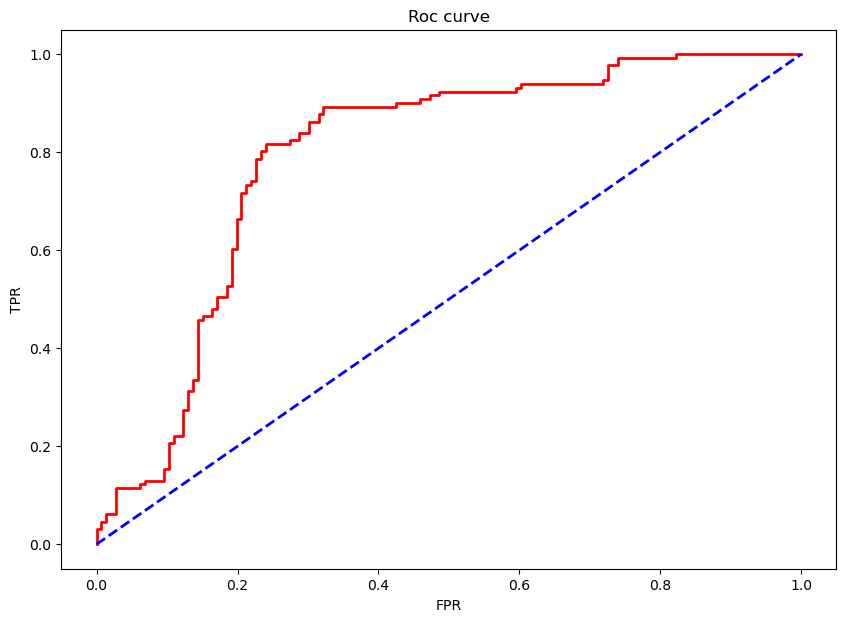

In [195]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Estimación con kernell Sigmoid:

In [196]:
Sig_svc=SVC(kernel='sigmoid',probability=True).fit(X_train,y_train)
y_predKS = Sig_svc.predict(X_test)

In [197]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(Sig_svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(Sig_svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.45
Precisión en el set de Test: 0.49


In [198]:
print('F-1 Score : ',(f1_score(y_test, y_predKS, average='micro')))

F-1 Score :  0.49097472924187724


In [199]:
print(classification_report(y_test,y_predKS))

              precision    recall  f1-score   support

           0       0.51      0.59      0.55       146
           1       0.45      0.38      0.41       131

    accuracy                           0.49       277
   macro avg       0.48      0.49      0.48       277
weighted avg       0.49      0.49      0.49       277



<AxesSubplot:>

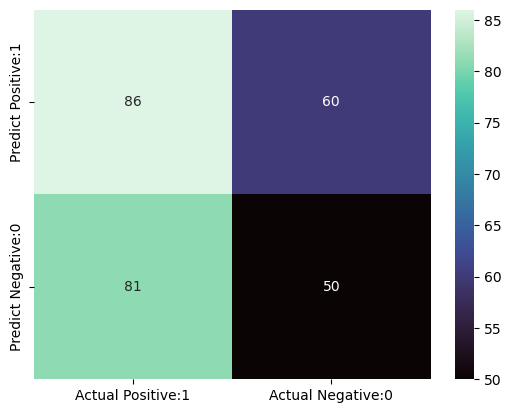

In [200]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_predKS)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [201]:
# sacar las probabilidades
y_pred_prob = Sig_svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

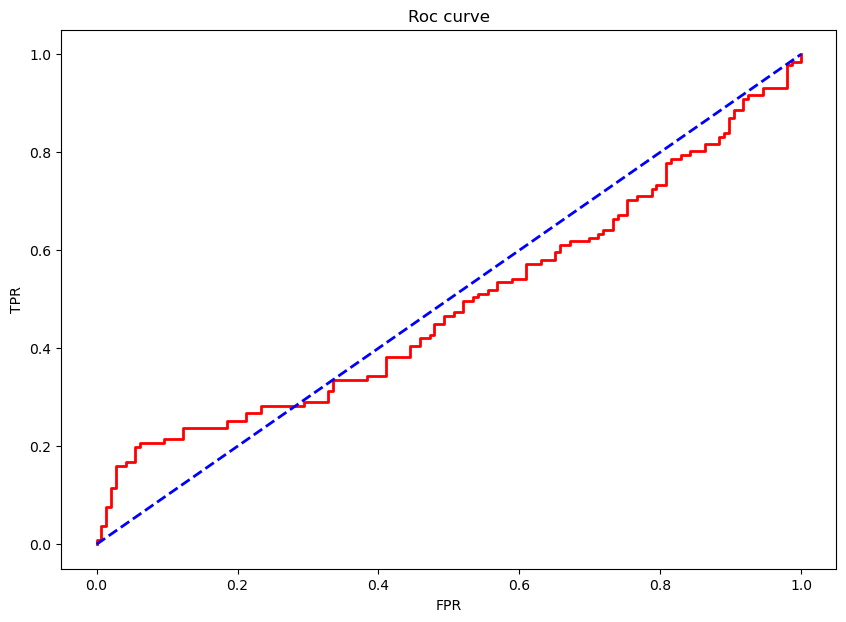

In [202]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

# análisis visual de top  2 predicciones en base a precisión

In [203]:
y_predxgb=pd.DataFrame(y_predxgb)
y_predxgb.columns=['Survived_xgb']
#prediccion con xgboost 

In [204]:
y_predxgb.shape

(277, 1)

In [205]:
y_pred_100=pd.DataFrame(y_pred_100)
y_pred_100.columns=['Survived_Random_Forest']
#prediccion con Random forest

In [206]:
y_pred_100.shape

(277, 1)

In [207]:
y_pred_100

,Survived_Random_Forest
0,0
1,1
2,1
3,0
4,1
...,...
272,0
273,0
274,0
275,1


In [208]:
X_test.shape

(277, 7)

In [209]:
X_test

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
608,3,1,0,0,2,42.0,8.6625
350,1,0,2,0,2,53.0,51.4792
299,2,0,0,0,2,50.0,10.5000
727,3,0,0,0,2,24.6,8.0500
253,2,0,1,1,2,31.0,26.2500
...,...,...,...,...,...,...,...
724,3,1,0,0,2,40.0,7.8958
422,3,1,0,0,2,20.0,8.0500
912,3,1,0,0,2,20.0,9.8458
116,3,0,0,0,1,29.2,7.8792


In [210]:
X_test=X_test.reset_index(drop=True)

In [211]:
test=pd.concat([X_test, y_predxgb,y_pred_100], axis=1)
test

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Survived_xgb,Survived_Random_Forest
0,3,1,0,0,2,42.0,8.6625,0,0
1,1,0,2,0,2,53.0,51.4792,1,1
2,2,0,0,0,2,50.0,10.5000,1,1
3,3,0,0,0,2,24.6,8.0500,1,0
4,2,0,1,1,2,31.0,26.2500,1,1
...,...,...,...,...,...,...,...,...,...
272,3,1,0,0,2,40.0,7.8958,0,0
273,3,1,0,0,2,20.0,8.0500,0,0
274,3,1,0,0,2,20.0,9.8458,0,0
275,3,0,0,0,1,29.2,7.8792,1,1


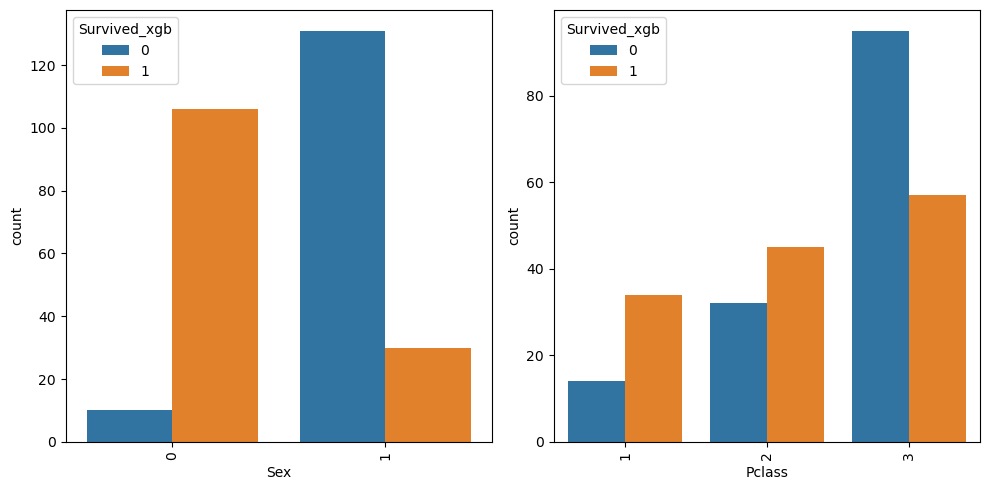

In [212]:
#se analizan las principales 2 variables categoricas segun decision tree para la prediccion de xgboost
cat_var=['Sex','Pclass']
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.countplot(x=var, data=test, hue='Survived_xgb',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

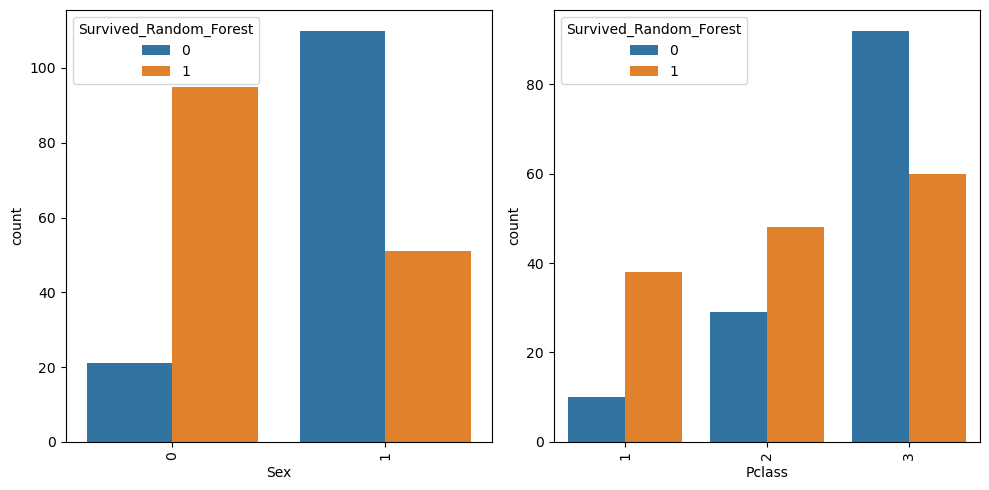

In [213]:
#se analizan las principales 2 variables categoricas segun decision tree para la prediccion de random forest
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.countplot(x=var, data=test, hue='Survived_Random_Forest',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

In [214]:
test['Pclass'] = test['Pclass'].astype(str)
test['Sex'] = test['Sex'].astype(str)

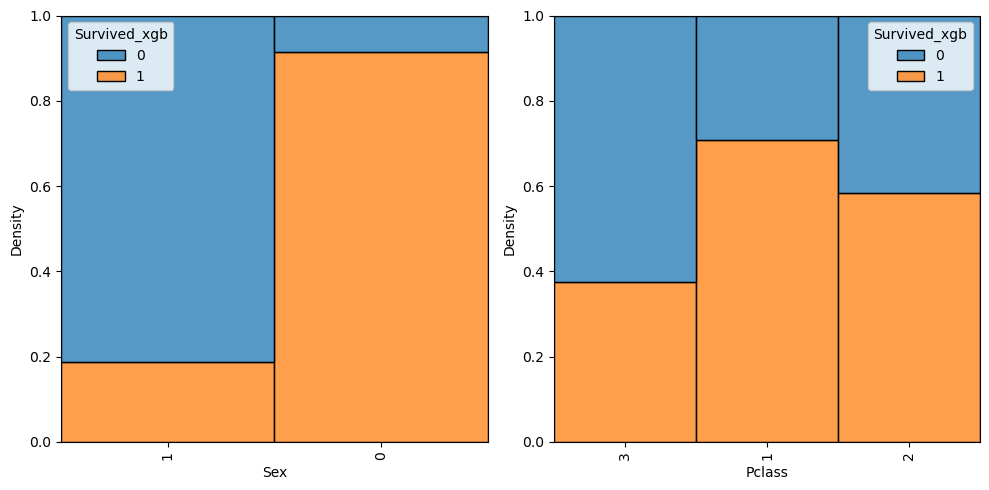

In [215]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.histplot(x=var,hue='Survived_xgb', data=test,ax=axs[i],
                 multiple = "fill",
                 kde = False, element = "bars", fill= True, 
                 stat = "density"
                )
    axs[i].set_xticklabels(train[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show()

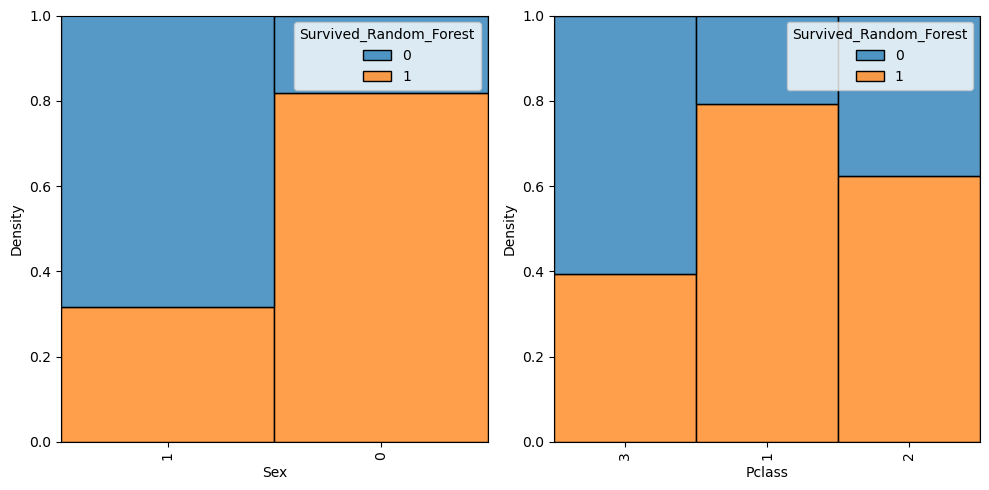

In [216]:

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.histplot(x=var,hue='Survived_Random_Forest', data=test,ax=axs[i],
                 multiple = "fill",
                 kde = False, element = "bars", fill= True, 
                 stat = "density"
                )
    axs[i].set_xticklabels(train[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show()

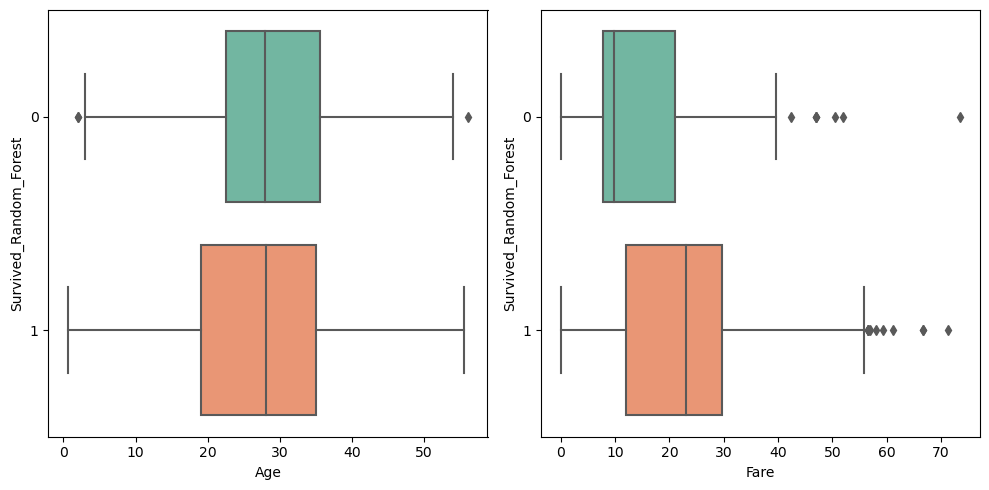

In [217]:
num_vars = ['Age', 'Fare']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, y='Survived_Random_Forest', data=test, ax=axs[i], orient='h', palette='Set2')

fig.tight_layout()
plt.show()

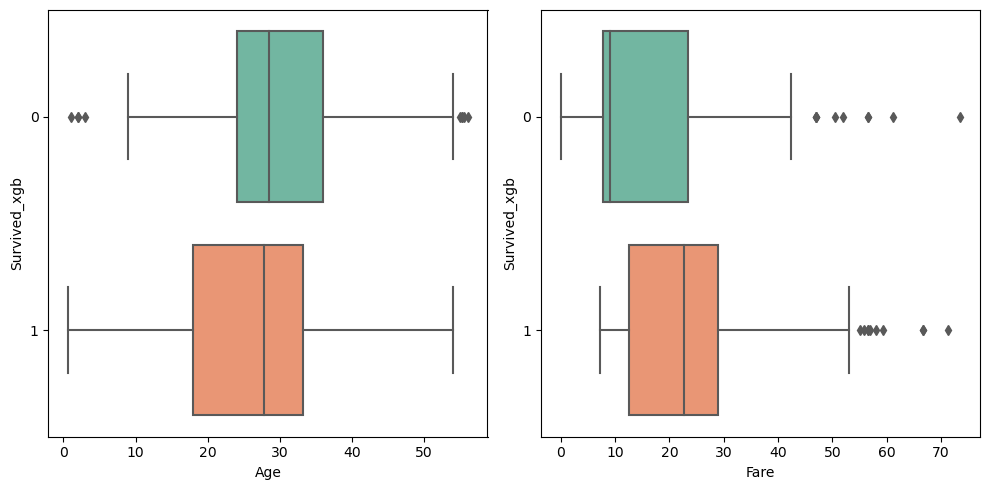

In [218]:
num_vars = ['Age', 'Fare']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, y='Survived_xgb', data=test, ax=axs[i], orient='h', palette='Set2')

fig.tight_layout()
plt.show()

# Prediccion en set de testeo

In [220]:
test_original.shape

(418, 10)

In [222]:
test_original

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
0,892,3,"Kelly, Mr. James",1,0,0,330911,1,34.5,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,2,47.0,7.0000
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,1,62.0,9.6875
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,2,27.0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,2,22.0,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0,0,A.5. 3236,2,25.4,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,0,0,PC 17758,0,39.0,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",1,0,0,SOTON/O.Q. 3101262,2,38.5,7.2500
416,1308,3,"Ware, Mr. Frederick",1,0,0,359309,2,25.4,8.0500


In [240]:
X_test= test_original.drop(['PassengerId','Name','Ticket'], axis=1)

In [241]:
y_predxgb = xgb.predict(X_test)

In [242]:
y_pred_100 = rfc_100.predict(X_test)

In [243]:
y_predxgb=pd.DataFrame(y_predxgb)
y_predxgb.columns=['Survived_xgb']

In [244]:
y_pred_100=pd.DataFrame(y_pred_100)
y_pred_100.columns=['Survived_Random_Forest']

In [245]:
y_predxgb

,Survived_xgb
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [246]:
X_test

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,3,1,0,0,1,34.5,7.8292
1,3,0,1,0,2,47.0,7.0000
2,2,1,0,0,1,62.0,9.6875
3,3,1,0,0,2,27.0,8.6625
4,3,0,1,1,2,22.0,12.2875
...,...,...,...,...,...,...,...
413,3,1,0,0,2,25.4,8.0500
414,1,0,0,0,0,39.0,108.9000
415,3,1,0,0,2,38.5,7.2500
416,3,1,0,0,2,25.4,8.0500


In [247]:
predicciones=pd.concat([X_test, y_predxgb,y_pred_100], axis=1)
predicciones

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Survived_xgb,Survived_Random_Forest
0,3,1,0,0,1,34.5,7.8292,0,0
1,3,0,1,0,2,47.0,7.0000,0,0
2,2,1,0,0,1,62.0,9.6875,0,0
3,3,1,0,0,2,27.0,8.6625,0,1
4,3,0,1,1,2,22.0,12.2875,1,0
...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,2,25.4,8.0500,0,0
414,1,0,0,0,0,39.0,108.9000,1,1
415,3,1,0,0,2,38.5,7.2500,0,0
416,3,1,0,0,2,25.4,8.0500,0,0


In [248]:
predicciones['Pclass'] = predicciones['Pclass'].astype(str)
predicciones['Sex'] = predicciones['Sex'].astype(str)

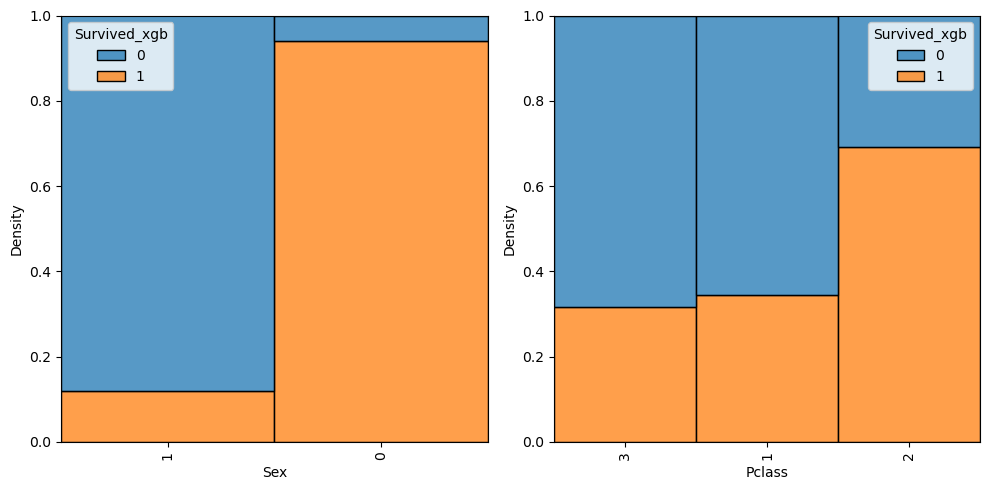

In [249]:
cat_var=['Sex','Pclass']
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.histplot(x=var,hue='Survived_xgb', data=predicciones,ax=axs[i],
                 multiple = "fill",
                 kde = False, element = "bars", fill= True, 
                 stat = "density"
                )
    axs[i].set_xticklabels(train[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show()

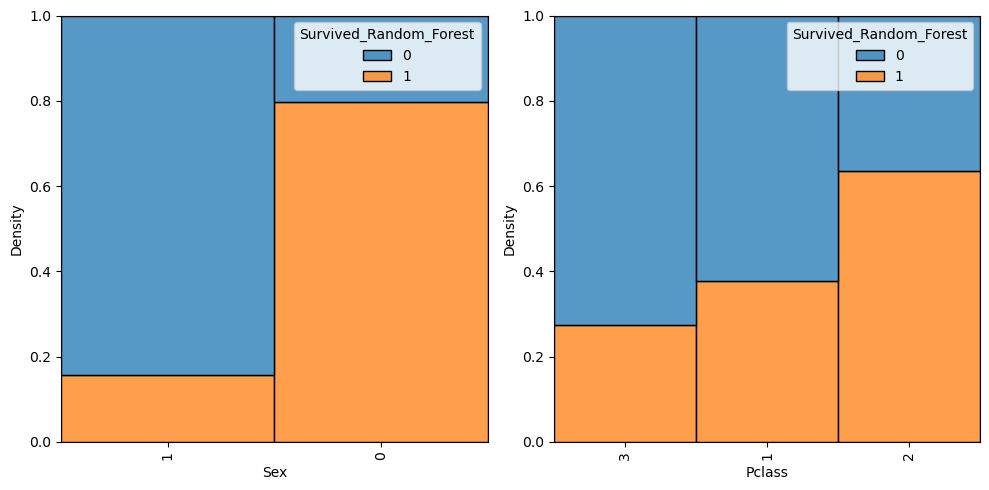

In [250]:
cat_var=['Sex','Pclass']
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate  (cat_var):
    sns.histplot(x=var,hue='Survived_Random_Forest', data=predicciones,ax=axs[i],
                 multiple = "fill",
                 kde = False, element = "bars", fill= True, 
                 stat = "density"
                )
    axs[i].set_xticklabels(train[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show()

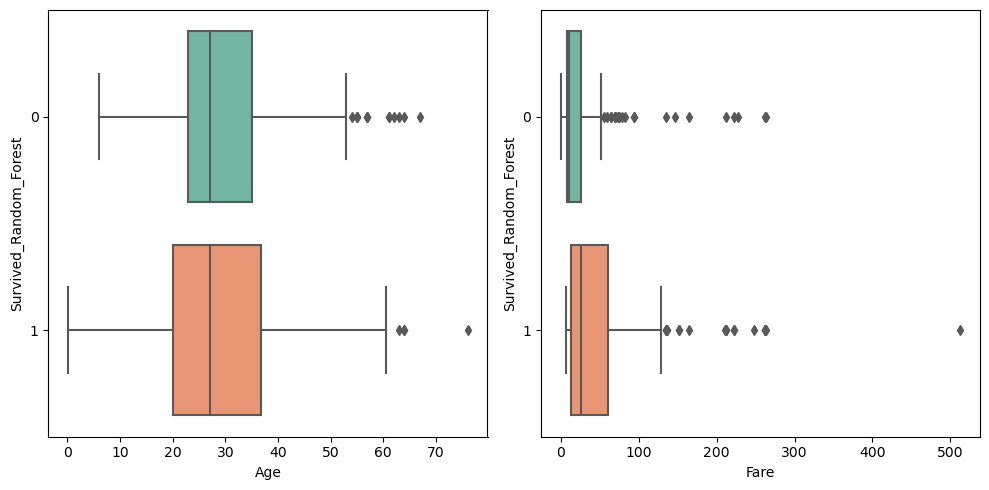

In [251]:
num_vars = ['Age', 'Fare']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, y='Survived_Random_Forest', data=predicciones, ax=axs[i], orient='h', palette='Set2')

fig.tight_layout()
plt.show()

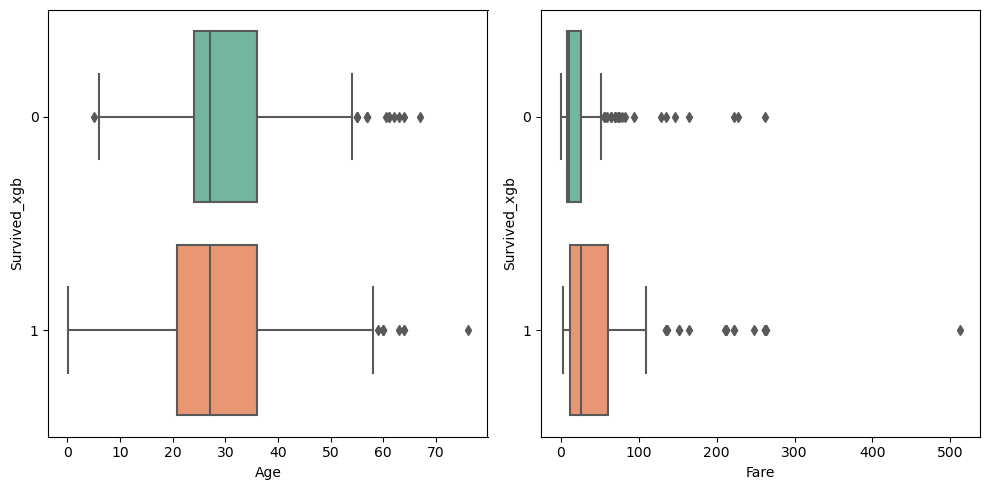

In [252]:
num_vars = ['Age', 'Fare']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, y='Survived_xgb', data=predicciones, ax=axs[i], orient='h', palette='Set2')

fig.tight_layout()
plt.show()

conclusiones:

-En el top 2 de algoritmos predicen que el sexo 0 (femenino) es el que mas sobrevive,junto con la clase/Pclass 3 en terminos de cantidad, pero en terminos proporcionales es mas importante la clase 1.
-random forest asigna importancia tambien a la edad y fare entre las principales variables.